# Flight Prediction

### Planned steps about how I want to create this project
* Data Gathering
    * Initial exploration
    * General statistics we can gather from dataset
    * Visualizing our dataset
* Data Cleaning
    * Finding a way to merging our 2 datasets and merging
    * Handle Missing Values
    * Imputing values
    * Removing Duplicates
    * Outlier Treatment
        * Identify outliers using box plots or statistical thresholds.
        * Handle via removal or transformation.
    * Handling 
* Data Transformation
    * Feature scaling
    * Normalizing and standardizing data
    * Encoding categorical data using (Cyclical for time, one hot maybe)
* Feature Engineering
    

## Problem Definition
In this notebook, I am going to analyze USA Flight's On Time Performance dataset. Also I'll try to implement a prediction model to predict possible future delays that could be occur.


## Data Gathering

* I downloaded flight data from bts.transtats.
* I gathered METAR data using metar4.py script from my project folder.

Before moving on with actual data I will generate my scripts with placeholder data at first.

Since the weather_data file contains many files, I consolidated them into 2024_Metar_Unified.parquet file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- CONFIGURATION ---
FLIGHTS_FILE = 'Data/2024.csv'  # Start with just one year for EDA
METAR_FILE = 'Data/METAR_2024.parquet'  # Weather data file
TARGET_DELAY_MINUTES = 10  # Your chosen threshold

In [3]:
flights = pd.read_csv(FLIGHTS_FILE)

display(pd.read_parquet('2024.parquet'))
display(pd.read_parquet('2025.parquet'))

# Displaying of our dataframes
display(flights)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_STATE_ABR,DEST,...,Origin_Dew,Origin_Wind,Origin_Vis,Origin_Wx,Dest_Temp,Dest_Dew,Dest_Wind,Dest_Vis,Dest_Wx,Is_Delayed_10min
0,2024,1,1,1,F9,N387FR,2541,SJU,PR,TPA,...,65.0,8.0,8.0,M,52.0,50.0,0.0,2.5,BR,1
1,2024,1,1,1,UA,N36280,174,GUM,TT,SPN,...,78.0,5.0,10.0,M,81.0,77.0,5.0,10.0,M,0
2,2024,1,1,1,F9,N377FR,4917,SJU,PR,ATL,...,65.0,8.0,8.0,M,42.0,32.0,4.0,10.0,M,1
3,2024,1,1,1,F9,N394FR,3247,SJU,PR,PHL,...,65.0,8.0,8.0,M,41.0,33.0,0.0,10.0,M,0
4,2024,1,1,1,UA,N69847,1162,BQN,PR,EWR,...,NaN,NaN,NaN,None,42.0,30.0,3.0,10.0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658254,2024,3,31,7,DL,N964AT,2464,ATL,GA,HSV,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,0
1658255,2024,3,31,7,DL,N955DZ,2257,ATL,GA,BHM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,0
1658256,2024,3,31,7,OO,N703SK,4114,ATL,GA,MGM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,0
1658257,2024,3,31,7,DL,N862DN,2017,ATL,GA,BHM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,0


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_STATE_ABR,DEST,...,Origin_Dew,Origin_Wind,Origin_Vis,Origin_Wx,Dest_Temp,Dest_Dew,Dest_Wind,Dest_Vis,Dest_Wx,Is_Delayed_10min
0,2025,1,1,3,UA,N77261,174,GUM,TT,SPN,...,74.0,8.0,10.0,M,82.000000,74.000000,7.0,10.0,M,0
1,2025,1,1,3,F9,None,4461,SJU,PR,PHL,...,72.0,3.0,8.0,FU,46.000000,45.000000,8.0,2.5,BR,0
2,2025,1,1,3,UA,N27421,1162,BQN,PR,EWR,...,NaN,NaN,NaN,None,48.000000,44.000000,7.0,5.0,BR,0
3,2025,1,1,3,B6,N957JB,229,BQN,PR,MCO,...,NaN,NaN,NaN,None,64.400002,64.400002,4.0,3.0,BR,0
4,2025,1,1,3,NK,N991NK,3164,SJU,PR,MCO,...,71.0,0.0,7.0,FU,64.400002,64.400002,4.0,3.0,BR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645498,2025,3,31,1,DL,N815DN,2257,ATL,GA,BHM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,1
1645499,2025,3,31,1,OO,N712SK,3935,ATL,GA,MGM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,0
1645500,2025,3,31,1,DL,N954AT,2034,ATL,GA,BHM,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,1
1645501,2025,3,31,1,DL,N923AT,3022,ATL,GA,HSV,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,1


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_STATE_ABR,DEST,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,2,1,4,9E,N131EV,4867,AGS,GA,ATL,...,813.0,-2.0,0.0,0.0,143.0,NaN,NaN,NaN,NaN,NaN
1,2024,2,1,4,9E,N131EV,5043,ATL,GA,SGF,...,1049.0,-20.0,0.0,0.0,563.0,NaN,NaN,NaN,NaN,NaN
2,2024,2,1,4,9E,N131EV,5043,SGF,MO,ATL,...,1433.0,-16.0,0.0,0.0,563.0,NaN,NaN,NaN,NaN,NaN
3,2024,2,1,4,9E,N131EV,5049,ATL,GA,XNA,...,2337.0,-21.0,0.0,0.0,589.0,NaN,NaN,NaN,NaN,NaN
4,2024,2,1,4,9E,N131EV,5312,VLD,GA,ATL,...,1908.0,226.0,0.0,0.0,208.0,0.0,0.0,0.0,0.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658254,2024,3,31,7,YX,N879RW,5826,RIC,VA,LGA,...,1143.0,-16.0,0.0,0.0,292.0,NaN,NaN,NaN,NaN,NaN
1658255,2024,3,31,7,YX,N979RP,3714,ORD,IL,LGA,...,1747.0,-24.0,0.0,0.0,733.0,NaN,NaN,NaN,NaN,NaN
1658256,2024,3,31,7,YX,N979RP,3716,LGA,NY,ORD,...,2127.0,22.0,0.0,0.0,733.0,0.0,0.0,22.0,0.0,0.0
1658257,2024,3,31,7,YX,N979RP,3718,ORD,IL,BDL,...,1024.0,-22.0,0.0,0.0,783.0,NaN,NaN,NaN,NaN,NaN


## Understanding our data
While we have aroun 1.6m data for first 3 months of 2024 we need to understand what our dataset means


In [4]:
print(flights.columns)

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')


### Analysis of dataset features

* `OP_UNIQUE_CARRIER` = An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. Use this field for analysis across a range of years.
* `TAIL_NUM` = 
* `OP_CARRIER_FL_NUM` = A one to four character alpha-numeric code for a particular flight.
* `ORIGIN` = Origin Airport
* `ORIGIN_STATE_ABR` = Origin Airport, State Code
* `DEST` = Destination Airport
* `DEST_STATE_ABR` = Destination Airport, State Code
* `CRS_DEP_TIME` = Computer Reservation System.  CRS provide information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets. CRS_DEP_TIME, basically planned departure time.
* `DEP_TIME` = Real Departure Time (local time: hhmm)
* `DEP_DELAY` = Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
* `TAXI_OUT` = The time elapsed between departure from the origin airport gate and wheels off. In minutes
* `WHEELS_OFF` = Wheels Off Time (local time: hhmm)
* `WHEELS_ON` = Wheels On Time (local time: hhmm)
* `TAXI_IN` = The time elapsed between wheels down and arrival at the destination airport gate. In minutes
* `CRS_ARR_TIME` = Planned arrival time.
* `ARR_TIME` = Real Arrival Time (local time: hhmm)
* `ARR_DELAY` = Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
* `CANCELLED` = A flight that was listed in a carrier's computer reservation system during the seven calendar days prior to scheduled departure but was not operated.
* `DIVERTED` = The difference between the scheduled departure time and the actual departure time from the origin airport gate.
* `DISTANCE` = Distance Between Origin and Destination in miles.

##### Delay Cause and time in minutes
* `CARRIER_DELAY` =
* `WEATHER_DELAY` = 
* `NAS_DELAY` = National Air System Delay
* `SECURITY_DELAY` = 
* `LATE_AIRCRAFT_DELAY` =


In this list of columns that we have, our target is going to be generated with the use of `ARR_DELAY` columns. We will check generate new column called `IsDelayed` = (`ARR_DELAY`>=10)

Also we have many null values as we printed out at cell 6 , since not all flight are getting delayed so delay reasons are null values.

### METAR Data

 Metar stands for Meteorological Aerodrome Report. It is mostly used by pilots, it is a type of weather report transmitted via radio and it changes hourly. In my METAR data I tried to get high value features we can get.

In [5]:
weather = pd.read_parquet(METAR_FILE)
display(weather)
print(weather.columns)

count_Missing = weather['wxcodes'].value_counts().get('M', 0)
print (f"Missing values at wxcodes: {count_Missing}")

metarinfo = pd.read_csv('Data/metar_info.csv')
print("information about wxcodes")
display(metarinfo)
uniqie_wxcodes = weather['wxcodes'].unique()
print(f"Unique wxcodes: {uniqie_wxcodes}")




,valid,tmpf,dwpf,sknt,vsby,wxcodes,Airport
0,2024-01-01 00:51:00,38.0,28.0,3.0,10.0,M,ABE
1,2024-01-01 01:51:00,38.0,28.0,3.0,10.0,M,ABE
2,2024-01-01 02:51:00,38.0,28.0,4.0,10.0,M,ABE
3,2024-01-01 03:51:00,37.0,31.0,3.0,10.0,M,ABE
4,2024-01-01 04:10:00,37.0,31.0,3.0,10.0,M,ABE
...,...,...,...,...,...,...,...
932051,2024-03-30 20:57:00,79.0,46.0,15.0,7.0,M,YUM
932052,2024-03-30 21:57:00,78.0,45.0,24.0,7.0,M,YUM
932053,2024-03-30 22:57:00,75.0,45.0,18.0,7.0,M,YUM
932054,2024-03-30 23:09:00,65.0,49.0,17.0,6.0,HZ,YUM


Index(['valid', 'tmpf', 'dwpf', 'sknt', 'vsby', 'wxcodes', 'Airport'], dtype='object')
Missing values at wxcodes: 671637
information about wxcodes


,Code,Meaning
0,-,slight
1,+,Heavy
2,BC,Patches
3,BL,Blowing
4,BR,Mist
5,DR,Low Drifting
6,DS,Dust Storm
7,DU,Widespread Dust
8,DZ,Drizzle
9,FG,Fog


Unique wxcodes: ['M' '-RA' 'UP' '-SN' 'SN FZFG' '-SN BR' 'SN FG' 'UP BR' 'RA BR' 'RA' 'BR'
 '-FZRA BR' '-FZRA' '-RA BR' '+RA BR' 'HZ' 'FG' '-RA FG' 'FZFG' '+SN FZFG'
 'VCTS -RA BR' 'VCTS -RA' 'VCTS +RA BR' 'VCTS RA BR' 'VCTS' '-TSRA'
 'TSRA BR' '+TSRA BR' '-TSRA BR' '+TSGRRA BR' 'VCTS -GRRA BR' '-TSGRRA BR'
 '-RA TS BR' '+RA RA BR' '+RA TS' '+TSRA' 'HZ SQ' '-RA VCTS' 'TS'
 '+RA TS BR' '+RA TS RA BR' 'TSRA' '+RA TS RA' '-RA TS' '-RASN' 'SN' '-DZ'
 '-DZ BR' '-RAGR BR' 'GS' 'GR' '+SN FG' 'HZ BLDU' 'VCBLDU' 'BLDU'
 '-RASN BR' '+TSRA FG' '+RA FG' 'VCTS RA' 'FU' 'HZ FU' 'BR FU' 'VCTS BR'
 'VCTS +RA' '+RA' 'FZRA BR' 'BR FG' 'SQ' '-SN BR SQ' '-SN FG' '-SN FZFG'
 '+SN' '+TSGRRA' 'VCTS +RA FG' 'MIFG' 'RA FG' 'BR MIFG' '-SNPL BR'
 '-PLSN BR' '-RAPL' '-RAPLSN' 'VCFG' '-RA VCFG' '+SN FG SQ' '-SNGS'
 '-SNGS BR' '-RAPL BR' '-RASNPL BR' '-SNRA BR' '-RAPLSN BR' '-FZDZ'
 '-FZDZSN' '-SN BLSN' 'SN BLSN' 'BCFG' 'BCFG BR' '-SNRA' '-SN SQ'
 '-SNGS SQ' '-FZRAPL BR' '-PL BR' 'FZRAPL BR' 'RAPL BR' 'RAPLSN BR'
 

* `valid` = timestamp of the observation at UTC(Zulu) time
* `tmpf` = Air Temperature in Fahrenheit, typically @ 2 meters
* `dwpf` = Dew Point Temperature in Fahrenheit, typically @ 2 meters
* `sknt` = Wind Speed in knots
* `vsby` = Visibility in miles
* `wxcodes` = Present Weather Codes (space seperated)

For our METAR data, we need to somehow merge this 2 dataset but there 2 problems, first of all since the METAR data timestamp is in format of UTC and our flights data is in local time we need to convert this METAR data to local time of corresponding airport.

Second issue is as we can see for `wxcodes` we have different paramaters and also their combination to describe the current weather condition. We need to find a way to encode this in meaningful way to correctly to use correctly in our model. For now I am going to focus on just merging the data with our flights data.



### Merge of 2 datasets
In the following codes I will try to merge and save a new whole dataset to use in future steps of this notebook

In [6]:
from zoneinfo import ZoneInfo

# --- CONFIGURATION ---
FILES = {
    2024: {'flights': 'Data/2024.csv', 'weather': 'Data/METAR_2024.parquet', 'out': '2024.parquet'},
    2025: {'flights': 'Data/2025.csv', 'weather': 'Data/METAR_2025.parquet', 'out': '2025.parquet'}
}

# --- 1. ROBUST TIMEZONE MAP (State -> IANA Timezone) ---
def get_timezone_map():
    # Defaults
    map_ = {
        # Eastern
        'CT':'America/New_York', 'DE':'America/New_York', 'DC':'America/New_York', 'FL':'America/New_York',
        'GA':'America/New_York', 'IN':'America/New_York', 'KY':'America/New_York', 'ME':'America/New_York',
        'MD':'America/New_York', 'MA':'America/New_York', 'MI':'America/New_York', 'NH':'America/New_York',
        'NJ':'America/New_York', 'NY':'America/New_York', 'NC':'America/New_York', 'OH':'America/New_York',
        'PA':'America/New_York', 'RI':'America/New_York', 'SC':'America/New_York', 'VT':'America/New_York',
        'VA':'America/New_York', 'WV':'America/New_York',
        # Central
        'AL':'America/Chicago', 'AR':'America/Chicago', 'IL':'America/Chicago', 'IA':'America/Chicago',
        'KS':'America/Chicago', 'LA':'America/Chicago', 'MN':'America/Chicago', 'MS':'America/Chicago',
        'MO':'America/Chicago', 'NE':'America/Chicago', 'ND':'America/Chicago', 'OK':'America/Chicago',
        'SD':'America/Chicago', 'TX':'America/Chicago', 'WI':'America/Chicago', 'TN':'America/Chicago',
        # Mountain
        'CO':'America/Denver', 'ID':'America/Denver', 'MT':'America/Denver', 'NM':'America/Denver',
        'UT':'America/Denver', 'WY':'America/Denver',
        # Pacific
        'AZ':'America/Phoenix', 'CA':'America/Los_Angeles', 'NV':'America/Los_Angeles',
        'OR':'America/Los_Angeles', 'WA':'America/Los_Angeles',
        # Others
        'AK':'America/Anchorage', 'HI':'Pacific/Honolulu', 'PR':'America/Puerto_Rico', 'VI':'America/Puerto_Rico'
    }
    # Specific Airport Overrides (Split States)
    overrides = {
        'ELP': 'America/Denver', 'BOI': 'America/Denver', # Texas/Idaho exceptions
        'NSV': 'America/Chicago', 'PHX': 'America/Phoenix'
    }
    return map_, overrides

TZ_DEFAULTS, TZ_OVERRIDES = get_timezone_map()

def get_tz(code, state):
    if code in TZ_OVERRIDES: return TZ_OVERRIDES[code]
    return TZ_DEFAULTS.get(state, 'UTC')

# --- 2. TIME CALCULATION ENGINE ---
def calculate_utc_times(df):
    """
    Converts Local Scheduled Departure and Arrival to UTC.
    Handles 'Overnight' flights and the '24:00' midnight edge case.
    """
    print("  > Constructing Datetimes...")
    
    # 1. Construct Base Departure Date
    date_cols = df[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(columns={'YEAR':'year', 'MONTH':'month', 'DAY_OF_MONTH':'day'})
    df['Dep_Date'] = pd.to_datetime(date_cols)
    
    # 2. Pad Times (e.g., 700 -> "0700", 2400 -> "2400")
    df['Dep_Str'] = df['CRS_DEP_TIME'].astype(int).astype(str).str.zfill(4)
    df['Arr_Str'] = df['CRS_ARR_TIME'].astype(int).astype(str).str.zfill(4)
    
    # 3. Handle Overnight Flights (Arrival is next day)
    # Logic: If Arr < Dep (e.g. Dep 2300, Arr 0100), it's overnight.
    # Note: We do this BEFORE fixing 2400 to preserve the relative logic.
    df['Overnight'] = (df['CRS_ARR_TIME'] < df['CRS_DEP_TIME']).astype(int)
    df['Arr_Date'] = df['Dep_Date'] + pd.to_timedelta(df['Overnight'], unit='D')
    
    # --- FIX FOR VALUE ERROR: "24:00" -> "00:00" NEXT DAY ---
    # Fix Departure 2400
    mask_dep_24 = df['Dep_Str'] == '2400'
    if mask_dep_24.any():
        print(f"    Fixed {mask_dep_24.sum()} departures scheduled at 24:00")
        df.loc[mask_dep_24, 'Dep_Str'] = '0000'
        df.loc[mask_dep_24, 'Dep_Date'] += pd.Timedelta(days=1)
        
    # Fix Arrival 2400
    mask_arr_24 = df['Arr_Str'] == '2400'
    if mask_arr_24.any():
        print(f"    Fixed {mask_arr_24.sum()} arrivals scheduled at 24:00")
        df.loc[mask_arr_24, 'Arr_Str'] = '0000'
        df.loc[mask_arr_24, 'Arr_Date'] += pd.Timedelta(days=1)
    # -------------------------------------------------------

    # 4. Construct Full Local Strings (Now safe from 24:00 error)
    df['Local_Dep_Full'] = df['Dep_Date'].astype(str) + ' ' + df['Dep_Str'].str[:2] + ':' + df['Dep_Str'].str[2:] + ':00'
    df['Local_Arr_Full'] = df['Arr_Date'].astype(str) + ' ' + df['Arr_Str'].str[:2] + ':' + df['Arr_Str'].str[2:] + ':00'
    
    print("  > Converting to UTC (Slow step, be patient)...")
    
    # 5. Vectorized Timezone Conversion
    df['Origin_TZ'] = df.apply(lambda x: get_tz(x['ORIGIN'], x['ORIGIN_STATE_ABR']), axis=1)
    df['Dest_TZ'] = df.apply(lambda x: get_tz(x['DEST'], x['DEST_STATE_ABR']), axis=1)

    utc_dep_chunks = []
    utc_arr_chunks = []

    # Process Departure Times
    for tz_name, group in df.groupby('Origin_TZ'):
        local_dt = pd.to_datetime(group['Local_Dep_Full'])
        utc_dt = local_dt.dt.tz_localize(tz_name, ambiguous='NaT', nonexistent='shift_forward').dt.tz_convert('UTC')
        utc_dep_chunks.append(pd.Series(utc_dt, index=group.index, name='UTC_DEP_TIME'))

    # Process Arrival Times
    for tz_name, group in df.groupby('Dest_TZ'):
        local_dt = pd.to_datetime(group['Local_Arr_Full'])
        utc_dt = local_dt.dt.tz_localize(tz_name, ambiguous='NaT', nonexistent='shift_forward').dt.tz_convert('UTC')
        utc_arr_chunks.append(pd.Series(utc_dt, index=group.index, name='UTC_ARR_TIME'))

    # Join back to main DF
    df = df.join(pd.concat(utc_dep_chunks))
    df = df.join(pd.concat(utc_arr_chunks))
    
    # Cleanup
    drop_cols = ['Dep_Date', 'Dep_Str', 'Arr_Str', 'Overnight', 'Arr_Date', 'Local_Dep_Full', 'Local_Arr_Full', 'Origin_TZ', 'Dest_TZ']
    df = df.drop(columns=drop_cols)
    
    return df

# --- 3. THE PIPELINE (MASTER FILE VERSION) ---
def process_dataset(year, config):
    print(f"\n=== PROCESSING {year} ===")
    
    # A. Load Flights
    print(f"Loading Flights: {config['flights']}...")
    cols = [
       'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
    ]
    
    flights = pd.read_csv(config['flights'], usecols=lambda c: c in cols)
    
    # Filter Q1 ONLY (Keep Cancellations for EDA)
    flights = flights[flights['MONTH'].isin([1, 2, 3])]
    
    # --- COMMENTED OUT TO KEEP CANCELLATIONS FOR EDA ---
    # flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)]
    # flights = flights.dropna(subset=['ARR_DELAY'])
    # ---------------------------------------------------
    
    # B. Calculate UTC Times
    # (Works fine for cancellations because they still have Scheduled CRS Times)
    flights = calculate_utc_times(flights)
    
    # C. Load Weather
    print(f"Loading Weather: {config['weather']}...")
    weather = pd.read_parquet(config['weather'])
    
    # Type & Timezone Fixes
    weather['Airport'] = weather['Airport'].astype(str)
    if weather['valid'].dt.tz is None:
        weather['valid'] = weather['valid'].dt.tz_localize('UTC')
    else:
        weather['valid'] = weather['valid'].dt.tz_convert('UTC')
    
    # Sort for merge_asof (Fixes "right keys must be sorted" error)
    weather = weather.sort_values('valid') 
    
    # D. DOUBLE MERGE
    print("Merging Origin Weather...")
    flights = flights.sort_values('UTC_DEP_TIME')
    
    flights = pd.merge_asof(
        flights, weather,
        left_on='UTC_DEP_TIME', right_on='valid',
        left_by='ORIGIN', right_by='Airport',
        direction='backward', tolerance=pd.Timedelta('2 hours')
    ).rename(columns={
        'tmpf':'Origin_Temp', 'dwpf':'Origin_Dew', 'sknt':'Origin_Wind', 
        'vsby':'Origin_Vis', 'wxcodes':'Origin_Wx'
    })
    
    print("Merging Destination Weather...")
    flights = flights.sort_values('UTC_ARR_TIME')
    
    flights = pd.merge_asof(
        flights, weather,
        left_on='UTC_ARR_TIME', right_on='valid',
        left_by='DEST', right_by='Airport',
        direction='backward', tolerance=pd.Timedelta('2 hours')
    ).rename(columns={
        'tmpf':'Dest_Temp', 'dwpf':'Dest_Dew', 'sknt':'Dest_Wind', 
        'vsby':'Dest_Vis', 'wxcodes':'Dest_Wx'
    })

    # E. Create Target & Save
    # Note: Cancellations will result in False (0) here because NaN > 10 is False.
    # This is fine for EDA, but remember to filter CANCELLED==0 before Training!
    flights['Is_Delayed_10min'] = (flights['ARR_DELAY'] > 10).astype(int)
    
    drop_final = ['valid_x', 'valid_y', 'Airport_x', 'Airport_y'] 
    flights = flights.drop(columns=[c for c in drop_final if c in flights.columns])
    
    print(f"Saving {len(flights):,} rows to {config['out']}...")
    flights.to_parquet(config['out'])
    print("Success!")

# --- EXECUTE ---
process_dataset(2024, FILES[2024])
process_dataset(2025, FILES[2025])


=== PROCESSING 2024 ===
Loading Flights: Data/2024.csv...
  > Constructing Datetimes...
    Fixed 1 departures scheduled at 24:00
  > Converting to UTC (Slow step, be patient)...
Loading Weather: Data/METAR_2024.parquet...
Merging Origin Weather...
Merging Destination Weather...
Saving 1,658,259 rows to 2024.parquet...
Success!

=== PROCESSING 2025 ===
Loading Flights: Data/2025.csv...
  > Constructing Datetimes...
  > Converting to UTC (Slow step, be patient)...
Loading Weather: Data/METAR_2025.parquet...
Merging Origin Weather...
Merging Destination Weather...
Saving 1,645,503 rows to 2025.parquet...
Success!


From now on we will not going to mess with our raw data do everything with our merged data.
So we need to reinitialize our datasets.

In [7]:
def report_weather_coverage(df):
    """Reports METAR match quality"""
    missing_origin = df['Origin_Wind'].isna().sum()
    missing_dest = df['Dest_Wind'].isna().sum()
    
    print(f"Missing Origin Weather: {missing_origin:,} ({missing_origin/len(df)*100:.1f}%)")
    print(f"Missing Dest Weather: {missing_dest:,} ({missing_dest/len(df)*100:.1f}%)")
    
    # Save for report
    coverage = pd.DataFrame({
        'Location': ['Origin', 'Destination'],
        'Missing': [missing_origin, missing_dest],
        'Coverage %': [(1-missing_origin/len(df))*100, (1-missing_dest/len(df))*100]
    })
    return coverage

print(report_weather_coverage(pd.read_parquet('2024.parquet')))
print(report_weather_coverage(pd.read_parquet('2025.parquet')))

Missing Origin Weather: 57,943 (3.5%)
Missing Dest Weather: 59,653 (3.6%)
      Location  Missing  Coverage %
0       Origin    57943   96.505793
1  Destination    59653   96.402673
Missing Origin Weather: 61,331 (3.7%)
Missing Dest Weather: 63,767 (3.9%)
      Location  Missing  Coverage %
0       Origin    61331   96.272811
1  Destination    63767   96.124772


## Data Exploration With Weather

Loading Dataset...
Data Loaded: 1,658,259 rows


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\1739274036.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_stats.index, y=day_stats.values, palette="viridis")


Saved EDA_Weekly_Cycle.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\1739274036.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxi_stats.index, y=taxi_stats.values, palette="rocket")


Saved EDA_Taxi_Congestion.png
Generating Delay Cause Analysis...
Saved EDA_Delay_Causes.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\1739274036.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_stats.index, y=carrier_stats.values, palette="mako")


Saved EDA_Airline_Reliability.png


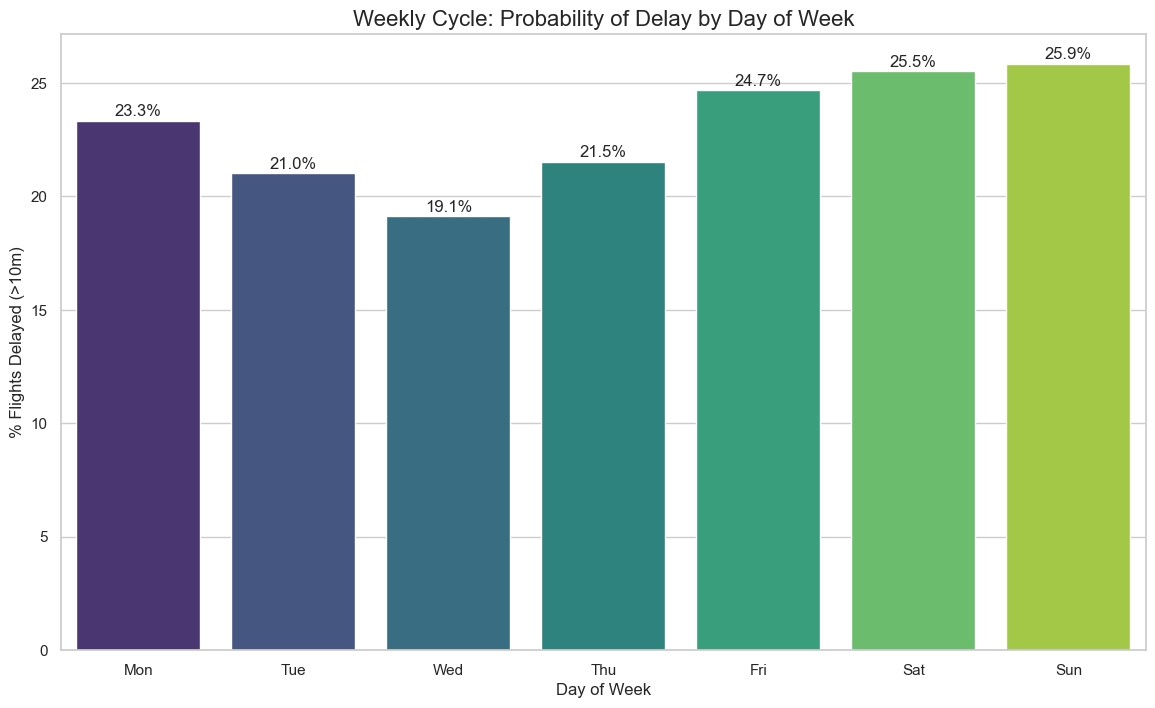

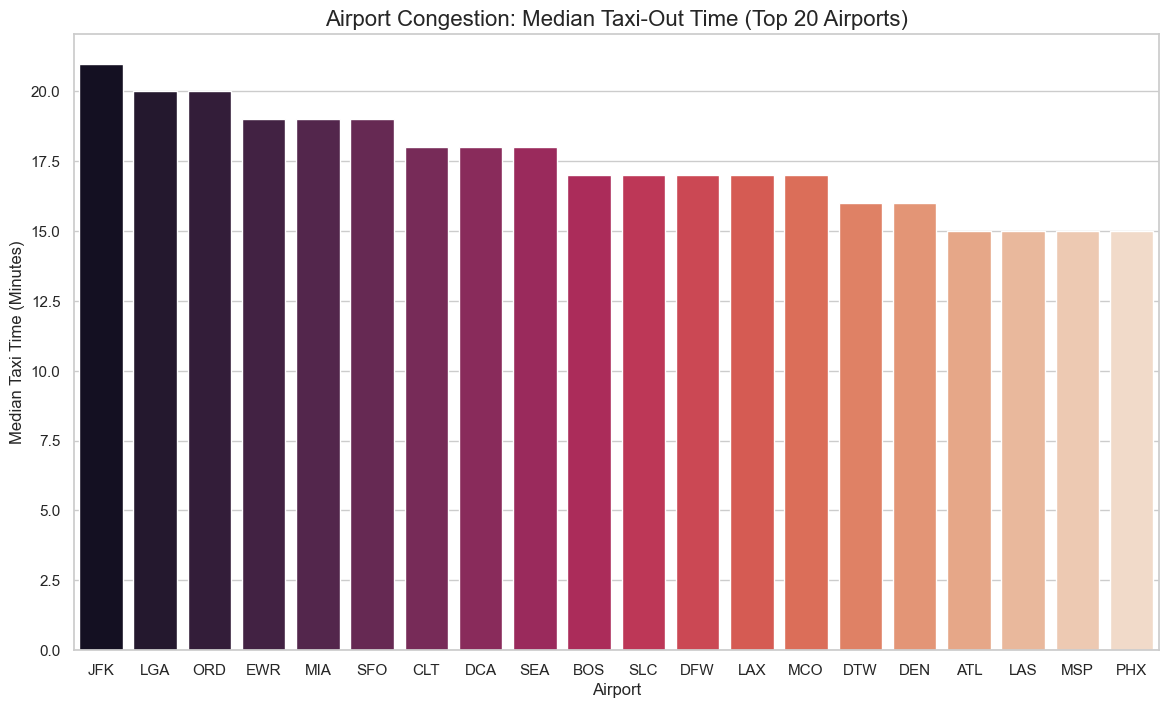

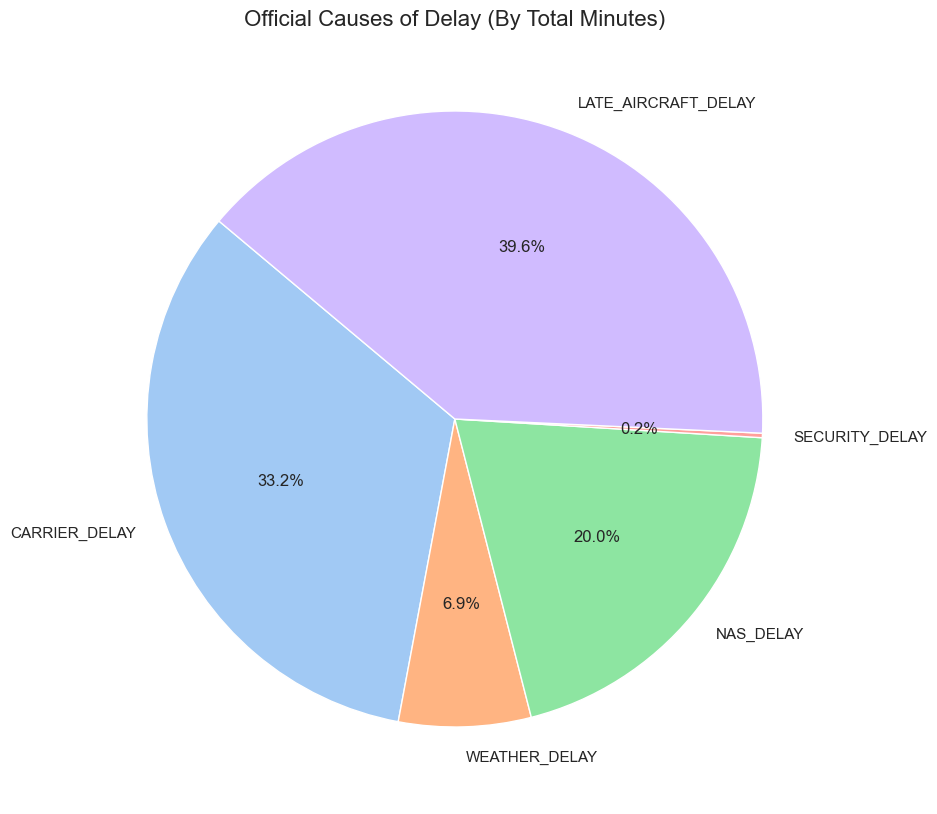

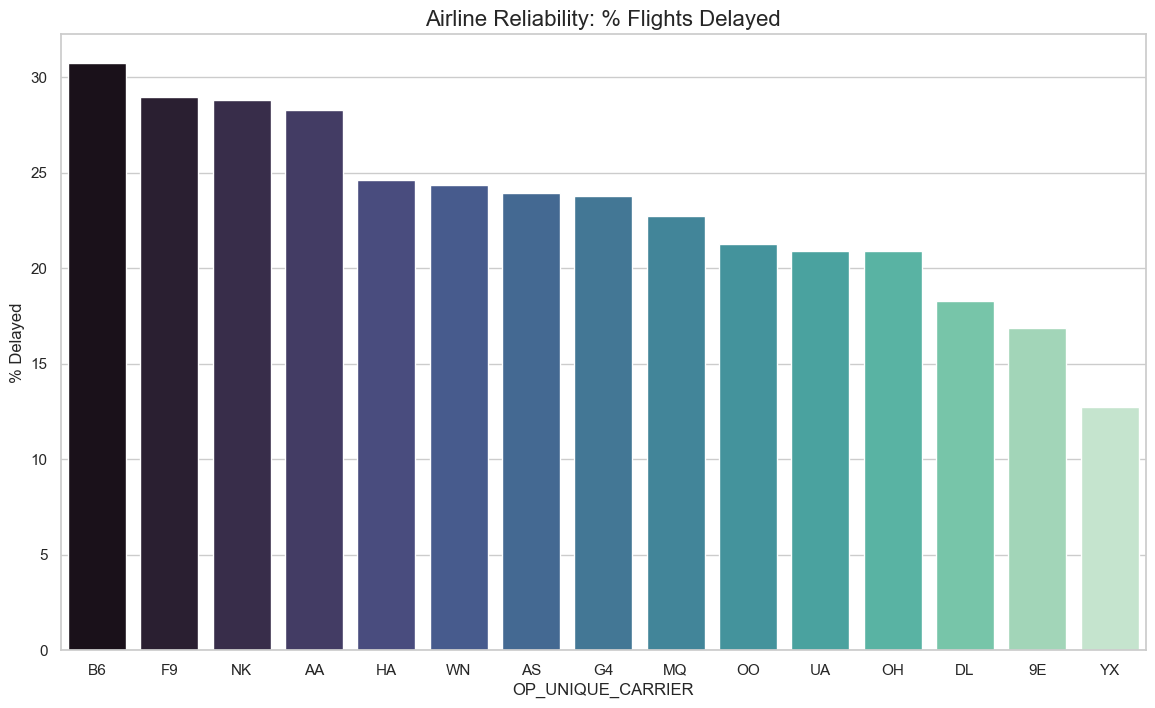

In [8]:
# --- CONFIGURATION ---
FILES = {
    '2024': '2024.parquet',
    '2025': '2025.parquet'
}
TARGET = 'Is_Delayed_10min'

# Setup Plotting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

def run_advanced_eda():
    print("Loading Dataset...")
    df = pd.read_parquet(FILES['2024'])
    
    # Feature Engineering for EDA
    df['Dep_Hour'] = (df['CRS_DEP_TIME'] / 100).astype(int)
    
    print(f"Data Loaded: {len(df):,} rows")

    # --- PART 1: TEMPORAL PATTERNS (Day of Week) ---
    if 'DAY_OF_WEEK' in df.columns:
        plt.figure()
        # Map 1-7 to Names for better charts
        day_map = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
        df['Day_Name'] = df['DAY_OF_WEEK'].map(day_map)
        
        # Order days correctly
        order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        
        day_stats = df.groupby('Day_Name')[TARGET].mean().reindex(order) * 100
        
        ax = sns.barplot(x=day_stats.index, y=day_stats.values, palette="viridis")
        plt.title('Weekly Cycle: Probability of Delay by Day of Week', fontsize=16)
        plt.ylabel('% Flights Delayed (>10m)')
        plt.xlabel('Day of Week')
        
        # Add values on top
        for i, v in enumerate(day_stats.values):
            ax.text(i, v + 0.2, f"{v:.1f}%", ha='center')
            
        plt.savefig('EDA_Weekly_Cycle.png')
        print("Saved EDA_Weekly_Cycle.png")

    # --- PART 2: OPERATIONAL EFFICIENCY (Taxi Times) ---
    if 'TAXI_OUT' in df.columns:
        plt.figure()
        # Top 20 Airports by Volume
        top_airports = df['ORIGIN'].value_counts().nlargest(20).index
        taxi_stats = df[df['ORIGIN'].isin(top_airports)].groupby('ORIGIN')['TAXI_OUT'].median().sort_values(ascending=False)
        
        sns.barplot(x=taxi_stats.index, y=taxi_stats.values, palette="rocket")
        plt.title('Airport Congestion: Median Taxi-Out Time (Top 20 Airports)', fontsize=16)
        plt.ylabel('Median Taxi Time (Minutes)')
        plt.xlabel('Airport')
        plt.savefig('EDA_Taxi_Congestion.png')
        print("Saved EDA_Taxi_Congestion.png")
        # Insight: JFK/LGA usually have 20+ min taxi times vs 10 min for others.

    # --- PART 3: OFFICIAL DELAY CAUSES (The "Blame Game") ---
    # These columns exist only for delayed flights.
    delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
    
    # Check if we have these columns filled (they are often NaN for on-time flights)
    if all(c in df.columns for c in delay_cols):
        print("Generating Delay Cause Analysis...")
        
        # Sum all delay minutes for the quarter
        total_minutes = df[delay_cols].sum()
        
        # Plot Pie Chart
        plt.figure(figsize=(10, 10))
        plt.pie(total_minutes, labels=total_minutes.index, autopct='%1.1f%%', 
                colors=sns.color_palette('pastel'), startangle=140)
        plt.title('Official Causes of Delay (By Total Minutes)', fontsize=16)
        plt.savefig('EDA_Delay_Causes.png')
        print("Saved EDA_Delay_Causes.png")
        
        # Insight: "Late Aircraft" is usually #1 (cascade effect). 
        # "Weather" might be small % officially, but NAS_DELAY often hides weather (ATC slowing down due to wind).

    # --- PART 4: AIRLINE PERFORMANCE (Updated) ---
    if 'OP_UNIQUE_CARRIER' in df.columns:
        plt.figure()
        carrier_stats = df.groupby('OP_UNIQUE_CARRIER')[TARGET].mean().sort_values(ascending=False) * 100
        sns.barplot(x=carrier_stats.index, y=carrier_stats.values, palette="mako")
        plt.title('Airline Reliability: % Flights Delayed', fontsize=16)
        plt.ylabel('% Delayed')
        plt.savefig('EDA_Airline_Reliability.png')
        print("Saved EDA_Airline_Reliability.png")

if __name__ == "__main__":
    run_advanced_eda()

--- 1. LOADING & MERGING DATASETS ---
Combined Data: 3,303,762 rows
 - 2024 Rows: 1,658,259
 - 2025 Rows: 1,645,503

--- GENERATING COMPARISON PLOTS ---
Saved EDA_YoY_Delay_Rate.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\71687222.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=delay_rates.index, y=delay_rates.values, palette=['#1f77b4', '#ff7f0e'])


Saved EDA_YoY_Weather_Drift.png
Saved EDA_YoY_Airline_Drift.png

Combined EDA Complete. You can now visually compare your Train vs. Test distributions.


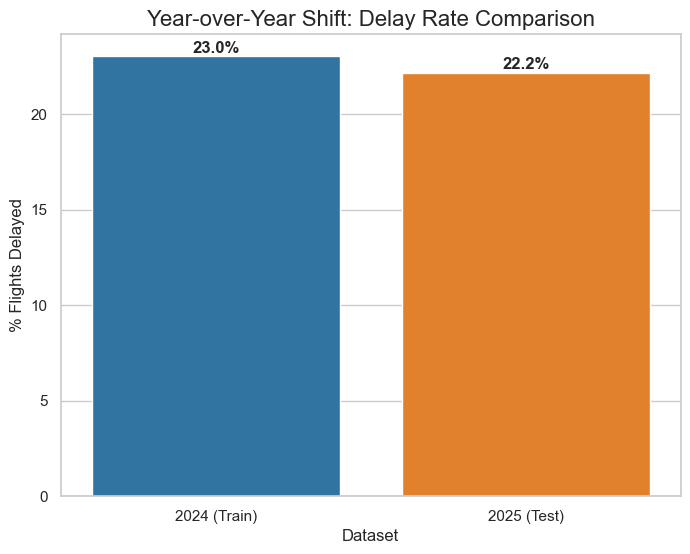

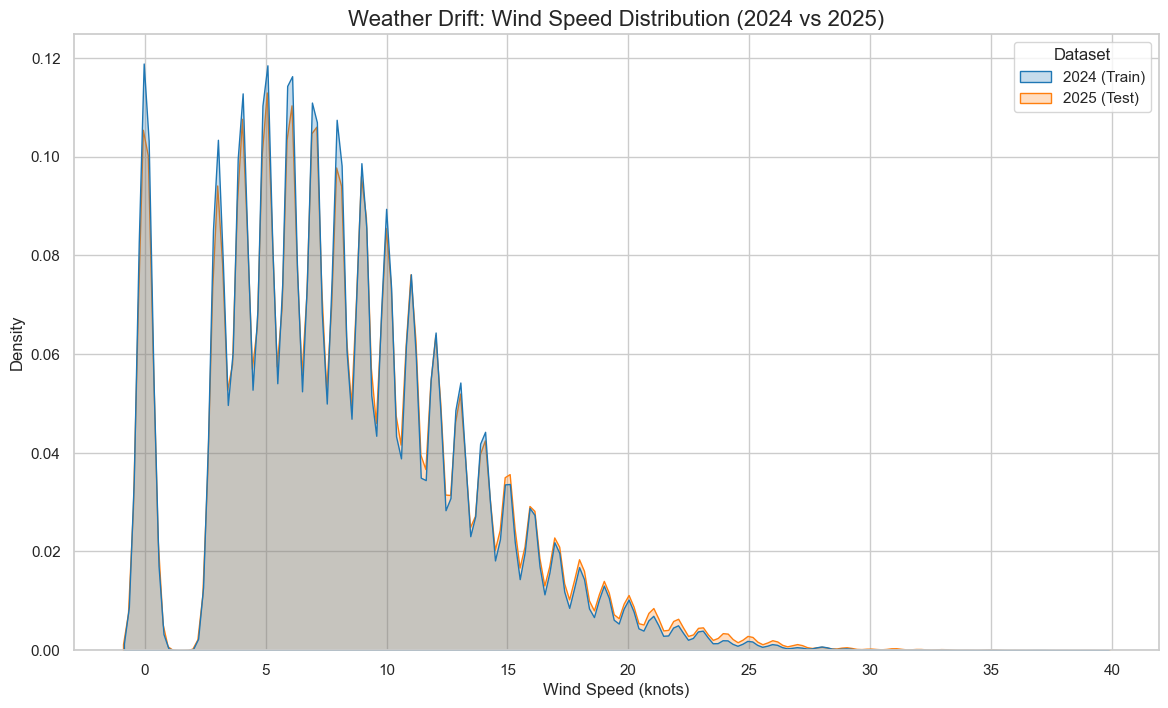

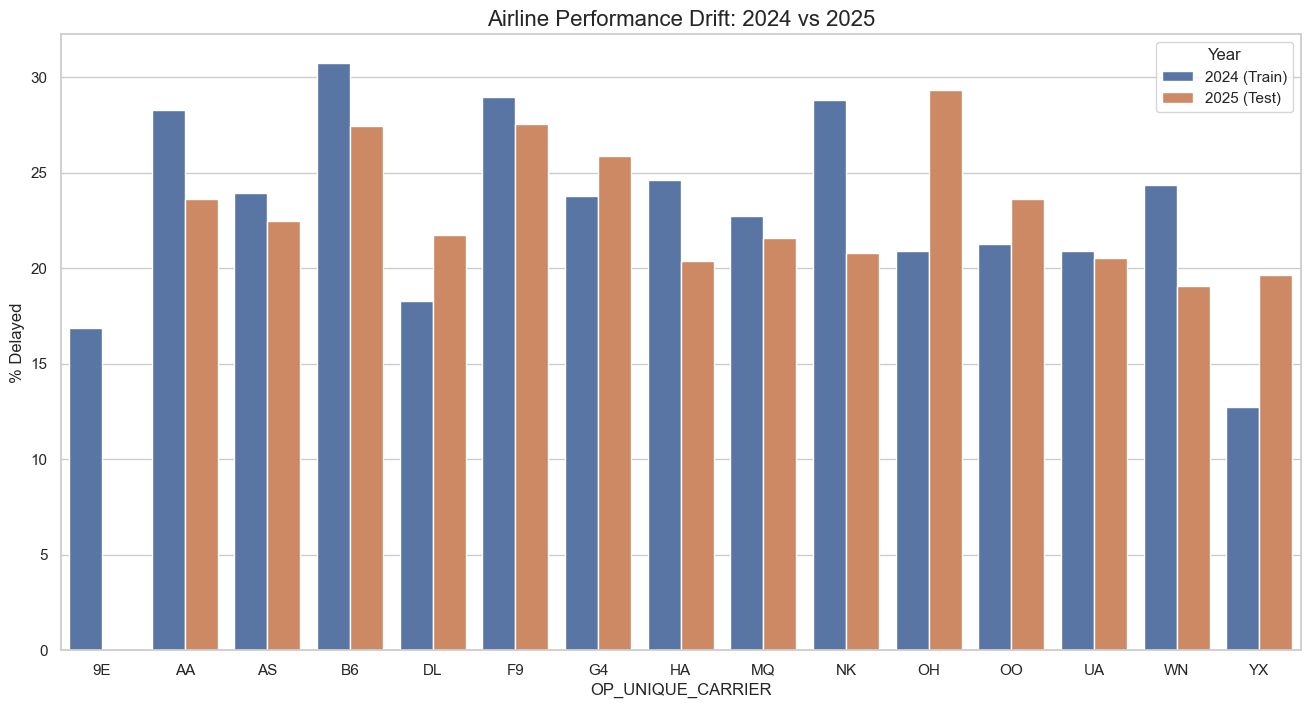

In [9]:
# Setup Plotting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

def run_combined_eda():
    print("--- 1. LOADING & MERGING DATASETS ---")
    try:
        df24 = pd.read_parquet(FILES['2024'])
        df25 = pd.read_parquet(FILES['2025'])
        
        # Add a clear label for plotting
        df24['Dataset'] = '2024 (Train)'
        df25['Dataset'] = '2025 (Test)'
        
        # Concatenate
        df = pd.concat([df24, df25], ignore_index=True)
        print(f"Combined Data: {len(df):,} rows")
        print(f" - 2024 Rows: {len(df24):,}")
        print(f" - 2025 Rows: {len(df25):,}")
        
    except FileNotFoundError:
        print("Error: Could not find one of the parquet files. Did you run the merge script for both years?")
        return

    # --- PART 2: THE DRIFT CHECK (Critical for Report) ---
    print("\n--- GENERATING COMPARISON PLOTS ---")
    
    # A. Target Shift: Are delays more common in 2025?
    plt.figure(figsize=(8, 6))
    delay_rates = df.groupby('Dataset')[TARGET].mean() * 100
    
    ax = sns.barplot(x=delay_rates.index, y=delay_rates.values, palette=['#1f77b4', '#ff7f0e'])
    plt.title('Year-over-Year Shift: Delay Rate Comparison', fontsize=16)
    plt.ylabel('% Flights Delayed')
    for i, v in enumerate(delay_rates.values):
        ax.text(i, v + 0.2, f"{v:.1f}%", ha='center', fontweight='bold')
    
    plt.savefig('EDA_YoY_Delay_Rate.png')
    print("Saved EDA_YoY_Delay_Rate.png")
    
    # B. Weather Shift: Was 2025 stormier? (Wind Speed)
    plt.figure()
    # Filter out extreme outliers for visualization
    clean_wind = df[df['Origin_Wind'] < 40]
    
    sns.kdeplot(data=clean_wind, x='Origin_Wind', hue='Dataset', fill=True, common_norm=False, palette='tab10')
    plt.title('Weather Drift: Wind Speed Distribution (2024 vs 2025)', fontsize=16)
    plt.xlabel('Wind Speed (knots)')
    plt.savefig('EDA_YoY_Weather_Drift.png')
    print("Saved EDA_YoY_Weather_Drift.png")

    # C. Operational Shift: Did Airlines get worse?
    if 'OP_UNIQUE_CARRIER' in df.columns:
        plt.figure(figsize=(16, 8))
        # Calculate delay rate per airline per year
        airline_drift = df.groupby(['OP_UNIQUE_CARRIER', 'Dataset'])[TARGET].mean().reset_index()
        airline_drift[TARGET] = airline_drift[TARGET] * 100 # Convert to %
        
        # --- FIX IS HERE: Changed 'berr=False' to 'errorbar=None' ---
        sns.barplot(data=airline_drift, x='OP_UNIQUE_CARRIER', y=TARGET, hue='Dataset', errorbar=None)
        
        plt.title('Airline Performance Drift: 2024 vs 2025', fontsize=16)
        plt.ylabel('% Delayed')
        plt.legend(title='Year')
        plt.savefig('EDA_YoY_Airline_Drift.png')
        print("Saved EDA_YoY_Airline_Drift.png")
        
    print("\nCombined EDA Complete. You can now visually compare your Train vs. Test distributions.")
if __name__ == "__main__":
    run_combined_eda()

--- LOADING MERGED DATASETS ---
Loading 2024 from 2024.parquet...
Loading 2025 from 2025.parquet...
Total Rows Loaded: 3,303,762

--- ANALYZING CANCELLATIONS ---
Found 59,151 cancelled flights.


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\2826804733.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_stats.index, y=cancel_stats.values, palette="Reds_r")


Saved EDA_Cancellation_Airline.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\2826804733.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_cancel = df.groupby('Wind_Bin')['CANCELLED'].mean() * 100
C:\Users\samet\AppData\Local\Temp\ipykernel_40180\2826804733.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_cancel.index, y=wind_cancel.values, palette="Oranges")


Saved EDA_Cancellation_Wind.png

--- ANALYZING EARLY ARRIVALS ---
Flights Arriving Early: 2,052,541 (63.4% of completed flights)
Saved EDA_Early_Arrivals.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\2826804733.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pad_stats.index, y=pad_stats.values, palette="Greens_d")


Saved EDA_Airline_Padding.png


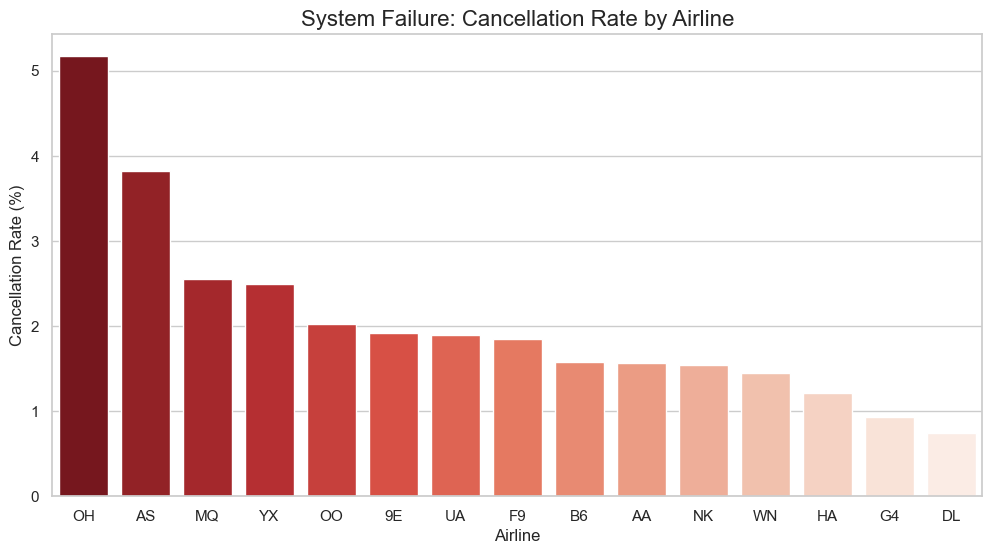

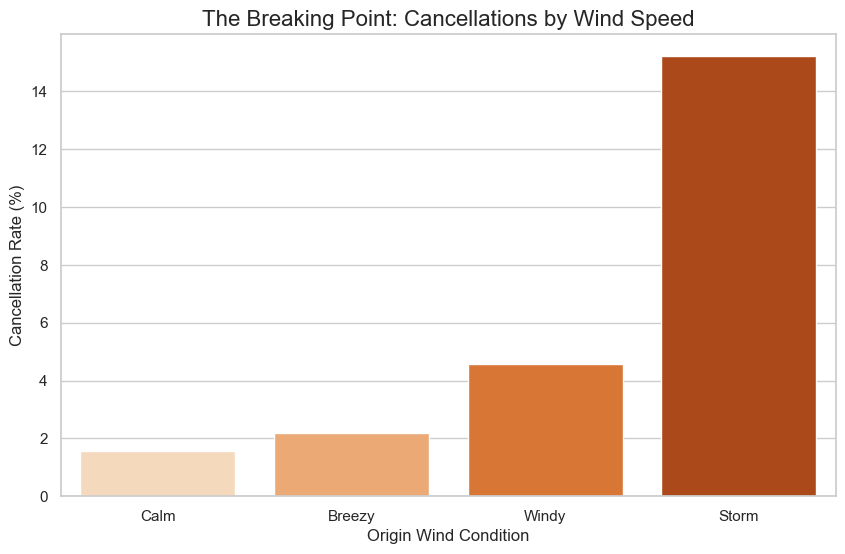

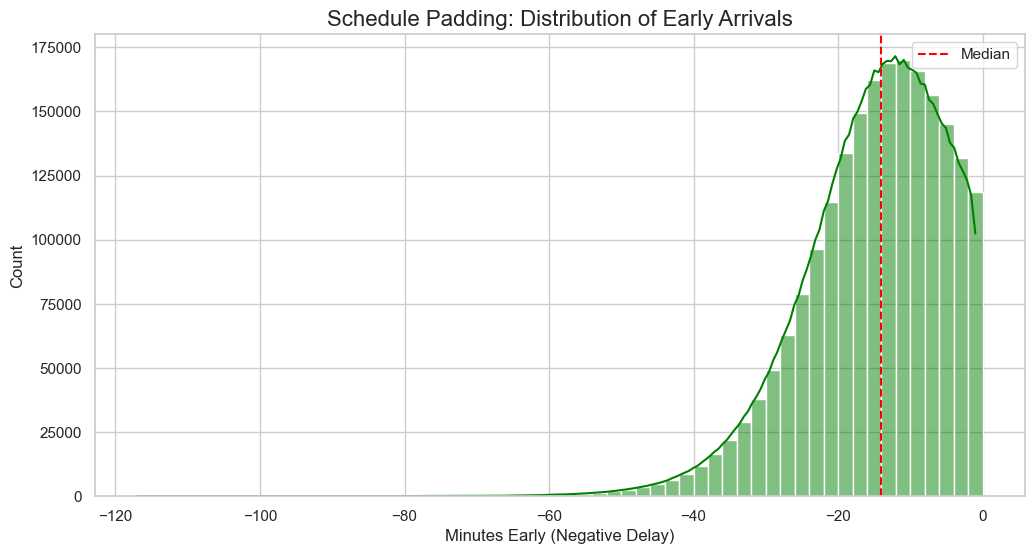

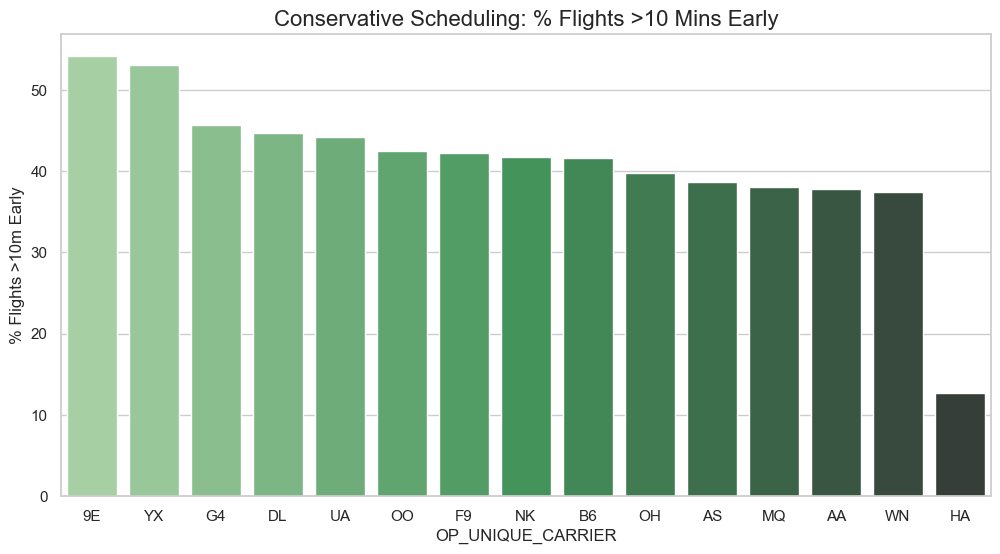

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Plotting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

def run_special_eda():
    print("--- LOADING MERGED DATASETS ---")
    dfs = []
    for label, fpath in FILES.items():
        try:
            print(f"Loading {label} from {fpath}...")
            # We load everything because you added all columns
            d = pd.read_parquet(fpath)
            d['Dataset'] = label
            dfs.append(d)
        except Exception as e:
            print(f"Error loading {fpath}: {e}")
            return

    df = pd.concat(dfs, ignore_index=True)
    print(f"Total Rows Loaded: {len(df):,}")

    

    # --- PART 1: CANCELLATIONS (System Failure) ---
    print("\n--- ANALYZING CANCELLATIONS ---")
    
    # Check if we actually have cancellations
    n_cancelled = df['CANCELLED'].sum()
    if n_cancelled == 0:
        print("⚠️ WARNING: No cancellations found! Did you filter them out during the merge?")
        print("   (Check if you used 'flights = flights[flights['CANCELLED'] == 0]' in your merge script)")
    else:
        print(f"Found {int(n_cancelled):,} cancelled flights.")
        
        # 1.1 Cancellation Rate by Airline
        if 'OP_UNIQUE_CARRIER' in df.columns:
            plt.figure(figsize=(12, 6))
            # Calculate % cancelled
            cancel_stats = df.groupby('OP_UNIQUE_CARRIER')['CANCELLED'].mean().sort_values(ascending=False) * 100
            
            sns.barplot(x=cancel_stats.index, y=cancel_stats.values, palette="Reds_r")
            plt.title('System Failure: Cancellation Rate by Airline', fontsize=16)
            plt.ylabel('Cancellation Rate (%)')
            plt.xlabel('Airline')
            plt.savefig('EDA_Cancellation_Airline.png')
            print("Saved EDA_Cancellation_Airline.png")

        # 1.2 Cancellation "Weather Impact" Check
        # Does Bad Origin Weather cause cancellations?
        if 'Origin_Wind' in df.columns:
            plt.figure(figsize=(10, 6))
            # Create Wind Bins
            df['Wind_Bin'] = pd.cut(df['Origin_Wind'], bins=[0, 10, 20, 30, 100], labels=['Calm', 'Breezy', 'Windy', 'Storm'])
            
            wind_cancel = df.groupby('Wind_Bin')['CANCELLED'].mean() * 100
            
            sns.barplot(x=wind_cancel.index, y=wind_cancel.values, palette="Oranges")
            plt.title('The Breaking Point: Cancellations by Wind Speed', fontsize=16)
            plt.ylabel('Cancellation Rate (%)')
            plt.xlabel('Origin Wind Condition')
            plt.savefig('EDA_Cancellation_Wind.png')
            print("Saved EDA_Cancellation_Wind.png")

    # --- PART 2: EARLY ARRIVALS (Schedule Padding) ---
    print("\n--- ANALYZING EARLY ARRIVALS ---")
    
    # We must filter for Completed Flights only (ArrDelay exists)
    df_complete = df.dropna(subset=['ARR_DELAY']).copy()
    
    # Filter for Early Arrivals (Negative Delay)
    early_flights = df_complete[df_complete['ARR_DELAY'] < 0]
    pct_early = (len(early_flights) / len(df_complete)) * 100
    print(f"Flights Arriving Early: {len(early_flights):,} ({pct_early:.1f}% of completed flights)")
    
    # 2.1 Distribution of Early Arrivals
    plt.figure(figsize=(12, 6))
    # Look at flights arriving between -60 min and 0 min
    sns.histplot(early_flights['ARR_DELAY'], bins=range(-60, 1, 2), kde=True, color='green')
    plt.title('Schedule Padding: Distribution of Early Arrivals', fontsize=16)
    plt.xlabel('Minutes Early (Negative Delay)')
    plt.axvline(early_flights['ARR_DELAY'].median(), color='red', linestyle='--', label='Median')
    plt.legend()
    plt.savefig('EDA_Early_Arrivals.png')
    print("Saved EDA_Early_Arrivals.png")

    # 2.2 Which Airlines Pad the Most?
    if 'OP_UNIQUE_CARRIER' in df.columns:
        plt.figure(figsize=(12, 6))
        # Define " padded" as arriving > 10 mins early
        df_complete['Is_Super_Early'] = (df_complete['ARR_DELAY'] < -10).astype(int)
        
        pad_stats = df_complete.groupby('OP_UNIQUE_CARRIER')['Is_Super_Early'].mean().sort_values(ascending=False) * 100
        
        sns.barplot(x=pad_stats.index, y=pad_stats.values, palette="Greens_d")
        plt.title('Conservative Scheduling: % Flights >10 Mins Early', fontsize=16)
        plt.ylabel('% Flights >10m Early')
        plt.savefig('EDA_Airline_Padding.png')
        print("Saved EDA_Airline_Padding.png")

if __name__ == "__main__":
    run_special_eda()

--- 1. LOADING DATA ---
Loading 2024 from 2024.parquet...
Loading 2025 from 2025.parquet...
Combined Data: 3,303,762 rows

Selectng all numerical columns...
Calculating Correlation Matrix for 27 features...
Columns included: ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Origin_Temp', 'Origin_Dew', 'Origin_Wind', 'Origin_Vis', 'Dest_Temp', 'Dest_Dew', 'Dest_Wind', 'Dest_Vis', 'Is_Delayed_10min']
Saved EDA_Full_Correlation_Matrix.png

--- TOP FEATURES CORRELATED WITH Is_Delayed_10min ---

Top POSITIVE Correlations (As these go UP, Delays go UP):
ARR_DELAY       0.548126
DEP_DELAY       0.461539
TAXI_OUT        0.302993
WHEELS_OFF      0.168618
DEP_TIME        0.165962
TAXI_IN         0.130954
CRS_DEP_TIME    0.117472
CRS_ARR_TIME    0.102747
Origin_Wind     0.077554
WHEELS_ON   

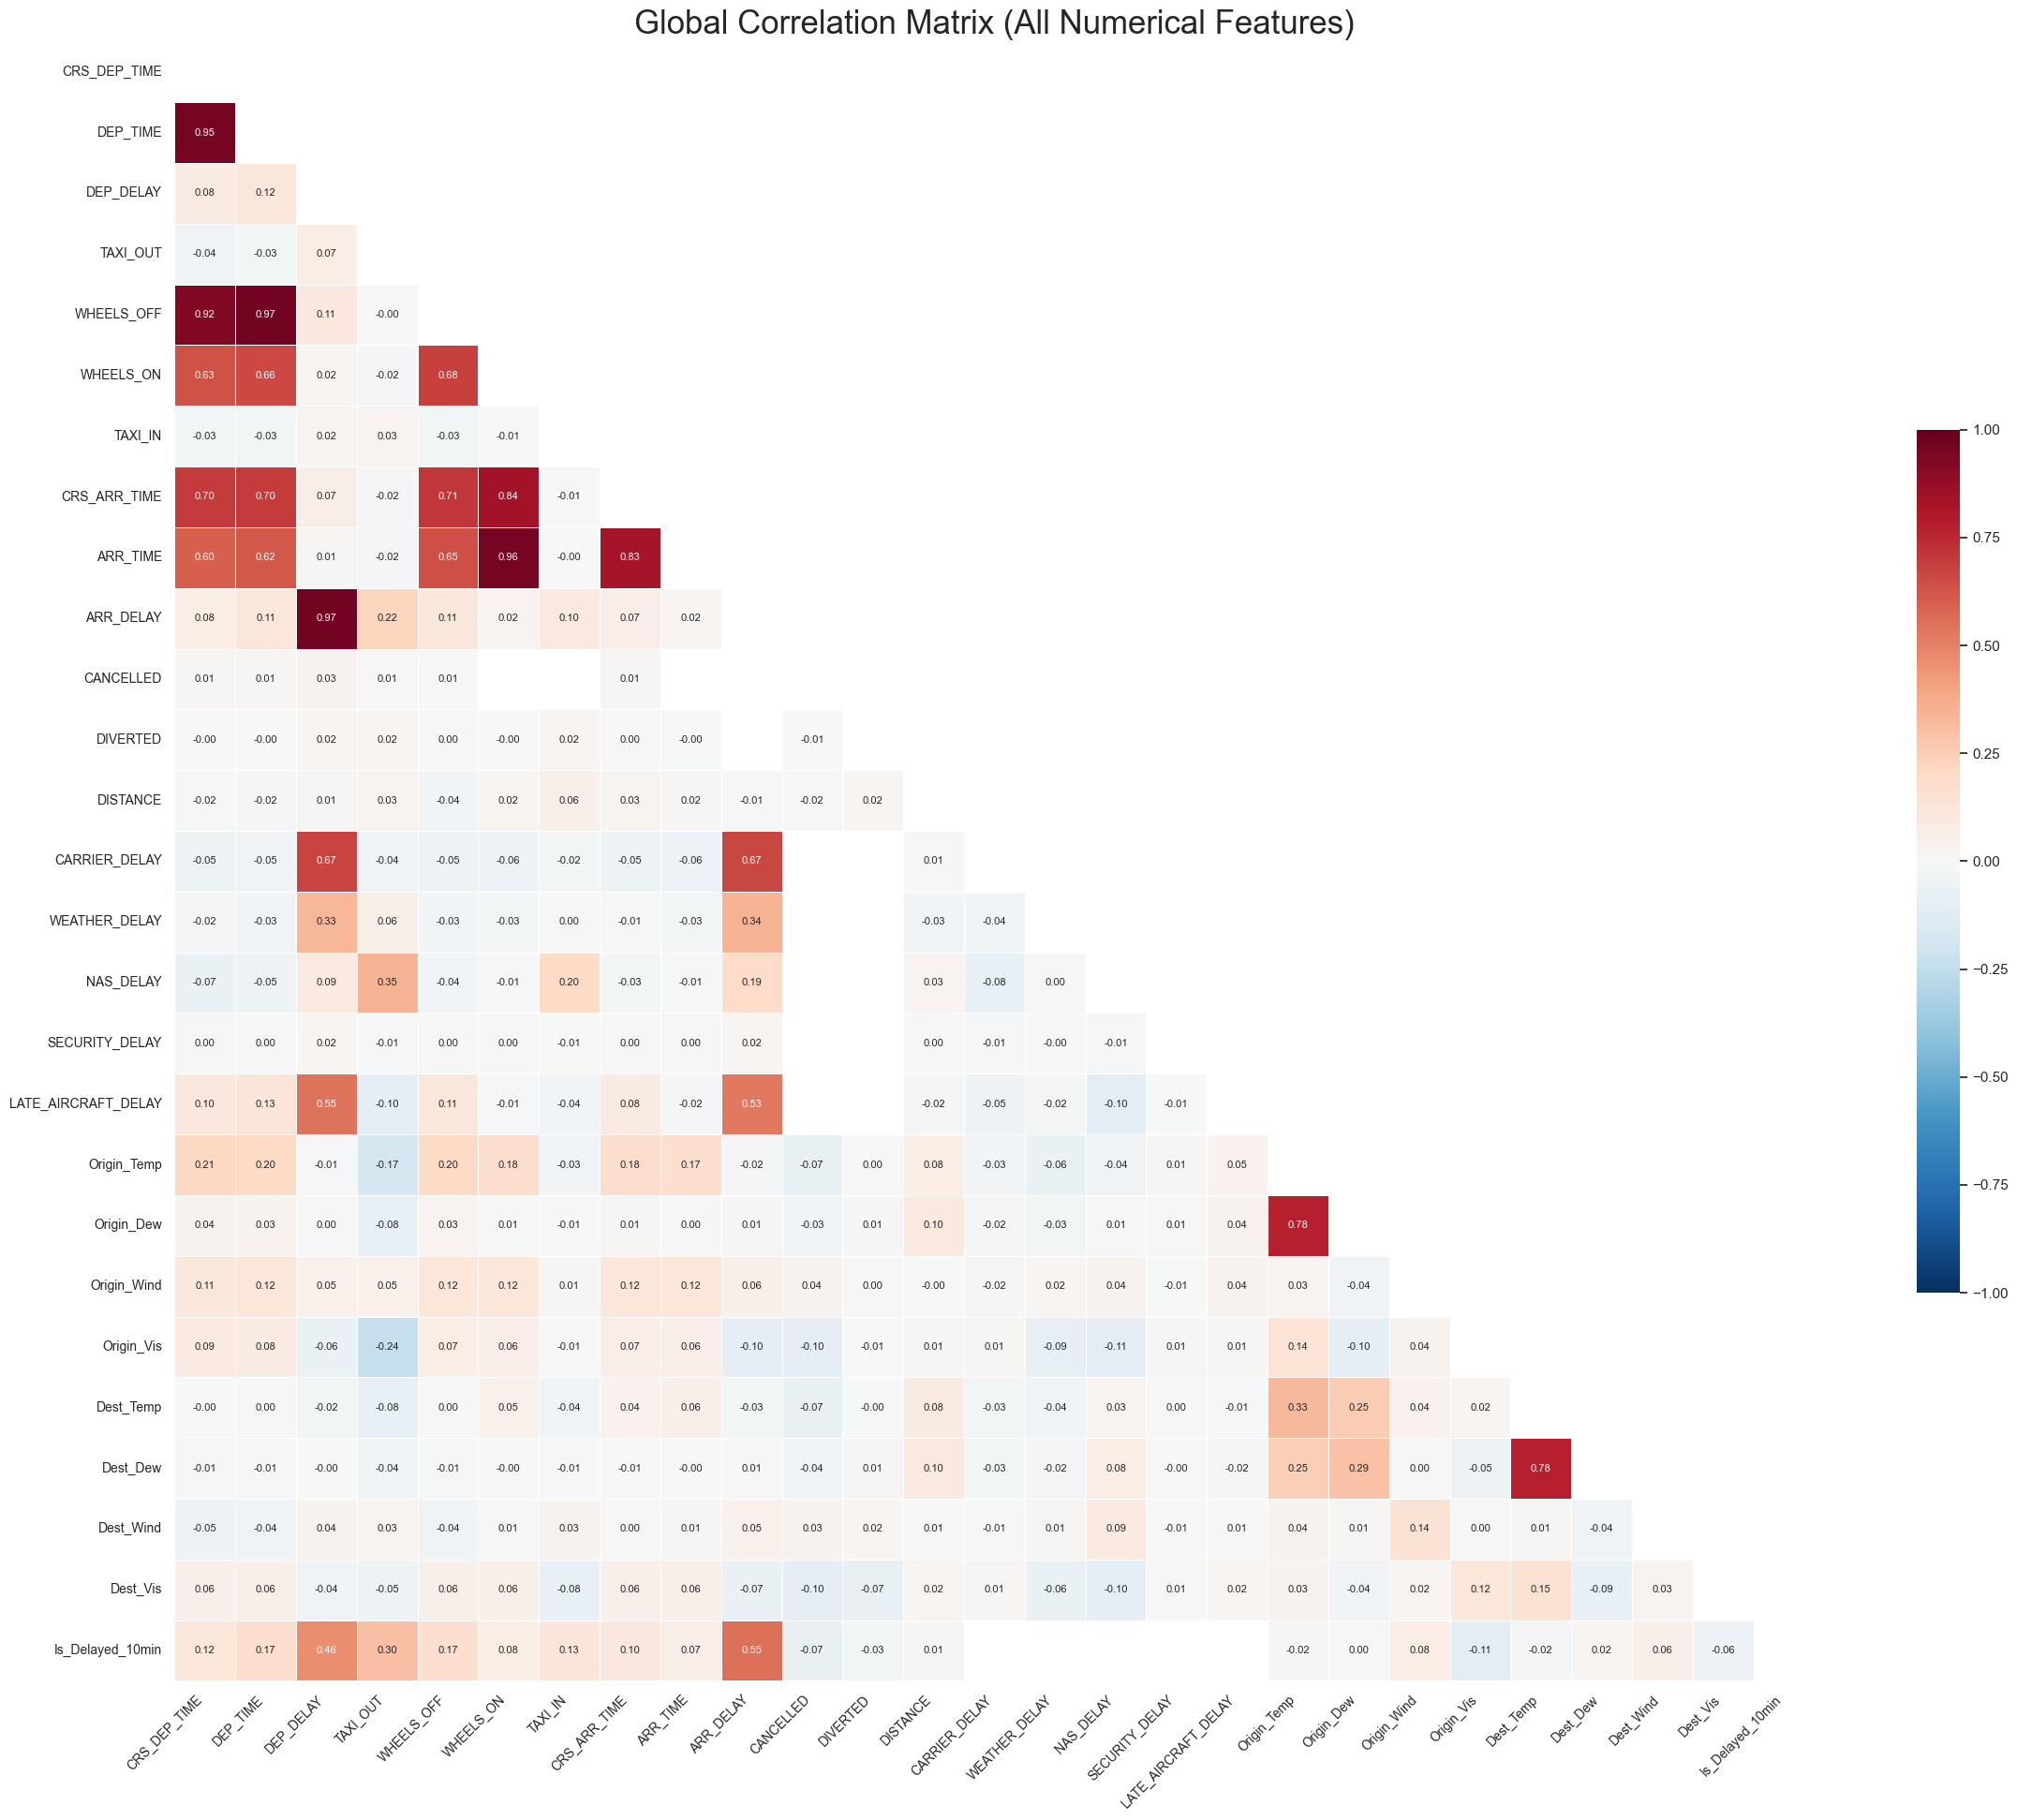

In [11]:
sns.set_theme(style="white")

def run_full_correlation():
    print("--- 1. LOADING DATA ---")
    dfs = []
    for year, fpath in FILES.items():
        try:
            print(f"Loading {year} from {fpath}...")
            d = pd.read_parquet(fpath)
            dfs.append(d)
        except Exception as e:
            print(f"Error loading {fpath}: {e}")
            return

    # Combine
    df = pd.concat(dfs, ignore_index=True)
    print(f"Combined Data: {len(df):,} rows")

    # --- 2. PREPARING NUMERICAL DATA ---
    print("\nSelectng all numerical columns...")
    
    # Select only number types (int, float)
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Drop columns that are IDs or useless for correlation
    drop_cols = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM'] 
    numeric_df = numeric_df.drop(columns=[c for c in drop_cols if c in numeric_df.columns])

    print(f"Calculating Correlation Matrix for {len(numeric_df.columns)} features...")
    print(f"Columns included: {list(numeric_df.columns)}")

    # Calculate Correlation (Pearson)
    corr = numeric_df.corr()

    # --- 3. THE GIANT HEATMAP ---
    plt.figure(figsize=(24, 20)) # Massive size for readability
    
    # Create a mask to hide the upper triangle (it's symmetrical duplicate info)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Draw the heatmap
    heatmap = sns.heatmap(
        corr, 
        mask=mask, 
        cmap='RdBu_r', # Red = Positive Corr, Blue = Negative Corr
        vmax=1, 
        vmin=-1, 
        center=0,
        square=True, 
        linewidths=.5, 
        cbar_kws={"shrink": .5},
        annot=True,        # Show numbers
        fmt=".2f",         # 2 decimal places
        annot_kws={"size": 8} # Small text to fit
    )

    plt.title('Global Correlation Matrix (All Numerical Features)', fontsize=25)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.savefig('EDA_Full_Correlation_Matrix.png', dpi=300) # High DPI for zooming
    print("Saved EDA_Full_Correlation_Matrix.png")

    # --- 4. TEXT REPORT: TOP CORRELATIONS WITH TARGET ---
    if TARGET in corr.columns:
        print(f"\n--- TOP FEATURES CORRELATED WITH {TARGET} ---")
        # Get correlation with target, sort absolute values
        target_corr = corr[TARGET].drop(TARGET) # Drop self
        top_positive = target_corr.sort_values(ascending=False).head(10)
        top_negative = target_corr.sort_values(ascending=True).head(5)
        
        print("\nTop POSITIVE Correlations (As these go UP, Delays go UP):")
        print(top_positive.to_string())
        
        print("\nTop NEGATIVE Correlations (As these go UP, Delays go DOWN):")
        print(top_negative.to_string())

if __name__ == "__main__":
    run_full_correlation()

## Data Preprocessing

In this part my aim is cleaning the datasets from data leakages, encoding columns, null datas. Also we will handle outliers at our dataset, 

In [12]:
import pandas as pd
import numpy as np

# --- CONFIGURATION ---
FILES = {
    '2024': {'in': '2024.parquet', 'out': '2024_Cleaned.parquet'},
    '2025': {'in': '2025.parquet', 'out': '2025_Cleaned.parquet'}
}

# --- COLUMNS TO DROP (STRICT LEAKAGE ONLY) ---
# We KEEP 'CRS_DEP_TIME' and 'CRS_ARR_TIME' for Feature Engineering later.
DROP_COLS = [
    # Leakage (Future Info - The "Cheat" Sheet)
    'DEP_TIME', 'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY', 
    'TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF', 'WHEELS_ON', 
    'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
    # Leakage (Official Cause Breakdowns)
    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
    # Identifiers / High Cardinality (Noise)
    'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'CANCELLATION_CODE',
    # Redundant UTC times (We use Local CRS times)
    'UTC_DEP_TIME', 'UTC_ARR_TIME',
    # Process flags
    'CANCELLED', 'DIVERTED', 'Route'
]

def clean_dataset(year, config):
    print(f"\n=== CLEANING {year} DATASET ===")
    df = pd.read_parquet(config['in'])
    original_len = len(df)
    
    # 1. FILTER VALID FLIGHTS
    if 'CANCELLED' in df.columns:
        df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]
    
    # 2. HANDLE NULLS
    print("  > Handling Missing Values...")
    
    # A. Target Check
    df = df.dropna(subset=['Is_Delayed_10min'])
    
    # B. Weather Check (Strict)
    weather_cols = ['Origin_Wind', 'Dest_Wind', 'Origin_Vis', 'Dest_Vis']
    df = df.dropna(subset=weather_cols)
    
    # 3. LEAKAGE REMOVAL
    print("  > Removing Leakage Columns...")
    cols_to_drop = [c for c in DROP_COLS if c in df.columns]
    df = df.drop(columns=cols_to_drop)
    
    # 4. FINAL CHECK
    print(f"  > Data Retained: {(len(df)/original_len)*100:.1f}%")
    print(f"  > Saving to {config['out']}...")
    df.to_parquet(config['out'])

# --- EXECUTE ---
for year, cfg in FILES.items():
    clean_dataset(year, cfg)


=== CLEANING 2024 DATASET ===
  > Handling Missing Values...
  > Removing Leakage Columns...
  > Data Retained: 93.9%
  > Saving to 2024_Cleaned.parquet...

=== CLEANING 2025 DATASET ===
  > Handling Missing Values...
  > Removing Leakage Columns...
  > Data Retained: 93.5%
  > Saving to 2025_Cleaned.parquet...


In [13]:
display(pd.read_parquet('2024_Cleaned.parquet').columns)

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_STATE_ABR', 'CRS_DEP_TIME',
       'CRS_ARR_TIME', 'DISTANCE', 'Origin_Temp', 'Origin_Dew', 'Origin_Wind',
       'Origin_Vis', 'Origin_Wx', 'Dest_Temp', 'Dest_Dew', 'Dest_Wind',
       'Dest_Vis', 'Dest_Wx', 'Is_Delayed_10min'],
      dtype='object')

## Feature Engineering

In [14]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# --- CONFIGURATION ---
FILES = {
    'TRAIN': '2024_Cleaned.parquet',
    'TEST':  '2025_Cleaned.parquet'
}
OUTPUTS = {
    'TRAIN': '2024_Ready.parquet',
    'TEST':  '2025_Ready.parquet'
}

# --- FUNCTIONS ---
def add_holiday_flag(df):
    """Creates Is_Holiday flag for high-traffic windows."""
    print("  > Identifying Holiday Traffic Windows...")
    date_cols = df[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(columns={'YEAR':'year', 'MONTH':'month', 'DAY_OF_MONTH':'day'})
    flight_dates = pd.to_datetime(date_cols)
    
    # Q1 Busy Dates (Fri-Mon windows)
    busy_dates = [
        '2024-01-01', '2024-01-02', 
        '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
        '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
        '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31',
        '2025-01-01', '2025-01-02',
        '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
        '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17'
    ]
    df['Is_Holiday'] = flight_dates.isin(pd.to_datetime(busy_dates)).astype(int)
    return df

def parse_weather_codes_robust(df, prefix):
    """Parses METAR strings into binary flags."""
    col = f'{prefix}_Wx'
    # Handle NaNs and ensure string
    df[col] = df[col].astype(str).fillna("M") 
    
    ice_codes = ['SN', 'FZ', 'PL', 'SG', 'IC', 'GR', 'GS']
    rain_codes = ['RA', 'DZ', 'SH']
    vis_codes = ['FG', 'BR', 'HZ', 'FU', 'VA', 'DU', 'SA', 'BL']
    storm_codes = ['TS', 'SQ', 'FC', 'SS', 'DS']
    
    df[f'{prefix}_Ice'] = df[col].apply(lambda x: 1 if any(c in x for c in ice_codes) else 0)
    df[f'{prefix}_Rain'] = df[col].apply(lambda x: 1 if (any(c in x for c in rain_codes) and 'FZ' not in x) else 0)
    df[f'{prefix}_LowVis'] = df[col].apply(lambda x: 1 if any(c in x for c in vis_codes) else 0)
    df[f'{prefix}_Storm'] = df[col].apply(lambda x: 1 if any(c in x for c in storm_codes) else 0)
    df[f'{prefix}_Heavy'] = df[col].apply(lambda x: 1 if '+' in x else 0)
    
    return df.drop(columns=[col])

def process_time_features(df):
    """Extracts Hour and Cyclic Encodes Time Variables."""
    dep_str = df['CRS_DEP_TIME'].astype(int).astype(str).str.zfill(4)
    df['Dep_Hour'] = dep_str.str[:2].astype(int)
    
    df['Dep_Hour_sin'] = np.sin(2 * np.pi * df['Dep_Hour'] / 24)
    df['Dep_Hour_cos'] = np.cos(2 * np.pi * df['Dep_Hour'] / 24)
    df['Month_sin'] = np.sin(2 * np.pi * df['MONTH'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['MONTH'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['DAY_OF_WEEK'] / 7)
    df['Day_cos'] = np.cos(2 * np.pi * df['DAY_OF_WEEK'] / 7)
    return df

def run_feature_engineering_fixed():
    print("Loading Cleaned Datasets...")
    train = pd.read_parquet(FILES['TRAIN'])
    test = pd.read_parquet(FILES['TEST'])
    
    # 1. HOLIDAYS
    print("Adding Holiday Flags...")
    train = add_holiday_flag(train)
    test = add_holiday_flag(test)

    # 2. ROUTE FEATURES
    print("Creating Route Features...")
    train['Route'] = train['ORIGIN'] + '-' + train['DEST']
    test['Route'] = test['ORIGIN'] + '-' + test['DEST']

    # 3. TIME FEATURES
    print("Processing Time Features...")
    train = process_time_features(train)
    test = process_time_features(test)

    # Clean up dates
    drop_dates = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'Dep_Hour', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH']
    train = train.drop(columns=[c for c in drop_dates if c in train.columns])
    test = test.drop(columns=[c for c in drop_dates if c in test.columns])

    # 4. WEATHER PARSING (FIXED: No Loop Variable Issue)
    print("Parsing Weather Codes...")
    train = parse_weather_codes_robust(train, 'Origin')
    train = parse_weather_codes_robust(train, 'Dest')
    test = parse_weather_codes_robust(test, 'Origin')
    test = parse_weather_codes_robust(test, 'Dest')

    # 5. TARGET ENCODING
    print("Target Encoding...")
    cat_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'Route']
    for c in cat_cols:
        train[c] = train[c].astype(str)
        test[c] = test[c].astype(str)

    encoder = ce.TargetEncoder(cols=cat_cols, smoothing=10)
    train_encoded = encoder.fit_transform(train[cat_cols], train['Is_Delayed_10min'])
    test_encoded = encoder.transform(test[cat_cols])
    
    train[cat_cols] = train_encoded
    test[cat_cols] = test_encoded
    
    # 6. SCALING
    print("Scaling Numerical Features...")
    num_cols = [
        'DISTANCE', 
        'Origin_Temp', 'Origin_Dew', 'Origin_Wind', 'Origin_Vis',
        'Dest_Temp', 'Dest_Dew', 'Dest_Wind', 'Dest_Vis'
    ]
    scaler = StandardScaler()
    train[num_cols] = scaler.fit_transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])

    # 7. SAVE
    print(f"Saving Fixed Files...")
    train.to_parquet(OUTPUTS['TRAIN'])
    test.to_parquet(OUTPUTS['TEST'])
    print("Feature Engineering Fixed & Complete!")

if __name__ == "__main__":
    run_feature_engineering_fixed()

Loading Cleaned Datasets...
Adding Holiday Flags...
  > Identifying Holiday Traffic Windows...
  > Identifying Holiday Traffic Windows...
Creating Route Features...
Processing Time Features...
Parsing Weather Codes...
Target Encoding...
Scaling Numerical Features...
Saving Fixed Files...
Feature Engineering Fixed & Complete!


In [15]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# --- CONFIGURATION ---
FILES = {
    'TRAIN': '2024_Cleaned.parquet',
    'TEST':  '2025_Cleaned.parquet'
}
OUTPUTS = {
    'TRAIN': '2024_Ready.parquet',
    'TEST':  '2025_Ready.parquet'
}

# --- FUNCTIONS ---
def add_holiday_flag(df):
    """Creates Is_Holiday flag for high-traffic windows."""
    print("  > Identifying Holiday Traffic Windows...")
    date_cols = df[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(columns={'YEAR':'year', 'MONTH':'month', 'DAY_OF_MONTH':'day'})
    flight_dates = pd.to_datetime(date_cols)
    
    # Q1 Busy Dates (Fri-Mon windows)
    busy_dates = [
        '2024-01-01', '2024-01-02', 
        '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
        '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
        '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31',
        '2025-01-01', '2025-01-02',
        '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
        '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17'
    ]
    df['Is_Holiday'] = flight_dates.isin(pd.to_datetime(busy_dates)).astype(int)
    return df

def parse_weather_codes_robust(df, prefix):
    """Parses METAR strings into binary flags using your Dictionary."""
    col = f'{prefix}_Wx'
    df[col] = df[col].astype(str).fillna("M") 
    
    ice_codes = ['SN', 'FZ', 'PL', 'SG', 'IC', 'GR', 'GS']
    rain_codes = ['RA', 'DZ', 'SH']
    vis_codes = ['FG', 'BR', 'HZ', 'FU', 'VA', 'DU', 'SA', 'BL']
    storm_codes = ['TS', 'SQ', 'FC', 'SS', 'DS']
    
    df[f'{prefix}_Ice'] = df[col].apply(lambda x: 1 if any(c in x for c in ice_codes) else 0)
    df[f'{prefix}_Rain'] = df[col].apply(lambda x: 1 if (any(c in x for c in rain_codes) and 'FZ' not in x) else 0)
    df[f'{prefix}_LowVis'] = df[col].apply(lambda x: 1 if any(c in x for c in vis_codes) else 0)
    df[f'{prefix}_Storm'] = df[col].apply(lambda x: 1 if any(c in x for c in storm_codes) else 0)
    df[f'{prefix}_Heavy'] = df[col].apply(lambda x: 1 if '+' in x else 0)
    
    return df.drop(columns=[col])

def process_time_features(df):
    """Extracts Hour and Cyclic Encodes Time Variables."""
    dep_str = df['CRS_DEP_TIME'].astype(int).astype(str).str.zfill(4)
    df['Dep_Hour'] = dep_str.str[:2].astype(int)
    
    df['Dep_Hour_sin'] = np.sin(2 * np.pi * df['Dep_Hour'] / 24)
    df['Dep_Hour_cos'] = np.cos(2 * np.pi * df['Dep_Hour'] / 24)
    df['Month_sin'] = np.sin(2 * np.pi * df['MONTH'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['MONTH'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['DAY_OF_WEEK'] / 7)
    df['Day_cos'] = np.cos(2 * np.pi * df['DAY_OF_WEEK'] / 7)
    return df

def run_feature_engineering_v5():
    print("Loading Cleaned Datasets...")
    train = pd.read_parquet(FILES['TRAIN'])
    test = pd.read_parquet(FILES['TEST'])
    
    # 1. HOLIDAYS
    print("Adding Holiday Flags...")
    train = add_holiday_flag(train)
    test = add_holiday_flag(test)

    # 2. ROUTE FEATURES
    print("Creating Route Features...")
    train['Route'] = train['ORIGIN'] + '-' + train['DEST']
    test['Route'] = test['ORIGIN'] + '-' + test['DEST']

    # 3. TIME FEATURES
    print("Processing Time Features...")
    train = process_time_features(train)
    test = process_time_features(test)

    # --- 4. TRAFFIC DENSITY (NEW!) ---
    print("Calculating Hourly Traffic Volume (The 'Rush Hour' Factor)...")
    # We calculate volume separately for 2024 and 2025 to reflect the actual schedule of that year.
    # Logic: Count how many flights share the same Origin + Hour
    
    # For Train
    train_traffic = train.groupby(['ORIGIN', 'Dep_Hour'])['Dep_Hour'].count().rename('Hourly_Volume').reset_index()
    train = train.merge(train_traffic, on=['ORIGIN', 'Dep_Hour'], how='left')
    
    # For Test
    test_traffic = test.groupby(['ORIGIN', 'Dep_Hour'])['Dep_Hour'].count().rename('Hourly_Volume').reset_index()
    test = test.merge(test_traffic, on=['ORIGIN', 'Dep_Hour'], how='left')
    
    # Fill NaNs with 0 (just in case)
    train['Hourly_Volume'] = train['Hourly_Volume'].fillna(0)
    test['Hourly_Volume'] = test['Hourly_Volume'].fillna(0)
    print("  > Traffic features added.")
    # ---------------------------------

    # Clean up dates (Now safe to drop)
    drop_dates = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'Dep_Hour', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH']
    train = train.drop(columns=[c for c in drop_dates if c in train.columns])
    test = test.drop(columns=[c for c in drop_dates if c in test.columns])

    # 5. WEATHER PARSING
    print("Parsing Weather Codes...")
    train = parse_weather_codes_robust(train, 'Origin')
    train = parse_weather_codes_robust(train, 'Dest')
    test = parse_weather_codes_robust(test, 'Origin')
    test = parse_weather_codes_robust(test, 'Dest')

    # 6. TARGET ENCODING
    print("Target Encoding...")
    cat_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'Route']
    for c in cat_cols:
        train[c] = train[c].astype(str)
        test[c] = test[c].astype(str)

    encoder = ce.TargetEncoder(cols=cat_cols, smoothing=10)
    train_encoded = encoder.fit_transform(train[cat_cols], train['Is_Delayed_10min'])
    test_encoded = encoder.transform(test[cat_cols])
    
    train[cat_cols] = train_encoded
    test[cat_cols] = test_encoded
    
    # 7. SCALING
    print("Scaling Numerical Features...")
    num_cols = [
        'DISTANCE', 
        'Origin_Temp', 'Origin_Dew', 'Origin_Wind', 'Origin_Vis',
        'Dest_Temp', 'Dest_Dew', 'Dest_Wind', 'Dest_Vis',
        'Hourly_Volume' # <--- Added this!
    ]
    scaler = StandardScaler()
    train[num_cols] = scaler.fit_transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])

    # 8. SAVE
    print(f"Saving Final 'Traffic-Enriched' Files...")
    train.to_parquet(OUTPUTS['TRAIN'])
    test.to_parquet(OUTPUTS['TEST'])
    print("Feature Engineering Complete. Ready for Retraining!")

if __name__ == "__main__":
    run_feature_engineering_v5()

Loading Cleaned Datasets...
Adding Holiday Flags...
  > Identifying Holiday Traffic Windows...
  > Identifying Holiday Traffic Windows...
Creating Route Features...
Processing Time Features...
Calculating Hourly Traffic Volume (The 'Rush Hour' Factor)...
  > Traffic features added.
Parsing Weather Codes...
Target Encoding...
Scaling Numerical Features...
Saving Final 'Traffic-Enriched' Files...
Feature Engineering Complete. Ready for Retraining!


In [16]:
display(pd.read_parquet('2024_Ready.parquet').head())
display(pd.read_parquet('2025_Ready.parquet').columns)

,YEAR,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,DISTANCE,Origin_Temp,Origin_Dew,Origin_Wind,...,Origin_Ice,Origin_Rain,Origin_LowVis,Origin_Storm,Origin_Heavy,Dest_Ice,Dest_Rain,Dest_LowVis,Dest_Storm,Dest_Heavy
0,2024,0.297347,0.348001,0.342441,0.291048,0.295986,0.680885,1.720040,1.710574,-0.013215,...,0,0,0,0,0,0,0,1,0,0
1,2024,0.217674,0.017341,0.048780,0.022966,0.113793,-1.197218,1.970254,2.491092,-0.607121,...,0,0,0,0,0,0,0,0,0,0
2,2024,0.297347,0.348001,0.342441,0.191138,0.192635,1.206347,1.720040,1.710574,-0.013215,...,0,0,0,0,0,0,0,0,0,0
3,2024,0.297347,0.348001,0.342441,0.251005,0.240433,1.255503,1.720040,1.710574,-0.013215,...,0,0,0,0,0,0,0,0,0,0
4,2024,0.297347,0.291728,0.257176,0.300205,0.295986,0.253735,-0.782099,-0.330781,0.976628,...,0,0,0,0,0,0,0,1,0,0


Index(['YEAR', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_STATE_ABR', 'DISTANCE', 'Origin_Temp', 'Origin_Dew',
       'Origin_Wind', 'Origin_Vis', 'Dest_Temp', 'Dest_Dew', 'Dest_Wind',
       'Dest_Vis', 'Is_Delayed_10min', 'Is_Holiday', 'Route', 'Dep_Hour_sin',
       'Dep_Hour_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
       'Hourly_Volume', 'Origin_Ice', 'Origin_Rain', 'Origin_LowVis',
       'Origin_Storm', 'Origin_Heavy', 'Dest_Ice', 'Dest_Rain', 'Dest_LowVis',
       'Dest_Storm', 'Dest_Heavy'],
      dtype='object')

Sanity Check

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
FILE_TRAIN = '2024_Ready.parquet'
TARGET = 'Is_Delayed_10min'

def final_sanity_check():
    print("Loading Training Data for Final Check...")
    df = pd.read_parquet(FILE_TRAIN)
    
    # --- CHECK 1: CLASS IMBALANCE ---
    print("\n--- 1. CLASS IMBALANCE CHECK ---")
    counts = df[TARGET].value_counts()
    total = len(df)
    neg = counts[0] # On Time
    pos = counts[1] # Delayed
    
    print(f"Total Flights: {total:,}")
    print(f"On-Time (0):   {neg:,} ({neg/total:.1%})")
    print(f"Delayed (1):   {pos:,} ({pos/total:.1%})")
    
    scale_pos_weight = neg / pos
    print(f"\nRECOMMENDATION:")
    if pos/total < 0.20:
        print(f"⚠️ Data is IMBALANCED.")
        print(f"   - For XGBoost, set scale_pos_weight = {scale_pos_weight:.2f}")
        print(f"   - For Random Forest, set class_weight = 'balanced'")
    else:
        print("✅ Balance looks okay. Standard training should work.")

    # --- CHECK 2: CORRELATION CLUSTERS ---
    print("\n--- 2. CHECKING FOR REDUNDANT FEATURES ---")
    # We look for correlation > 0.95 (duplicates)
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    if to_drop:
        print(f"⚠️ Found {len(to_drop)} highly correlated features (r > 0.95):")
        print(to_drop)
        print("   -> Decision: Tree models (XGBoost) handle this fine. Linear models do not.")
    else:
        print("✅ No highly redundant features found.")

    print("\nREADY TO TRAIN! 🚀")

if __name__ == "__main__":
    final_sanity_check()
    # We need to drop year columns since we don't need 

Loading Training Data for Final Check...

--- 1. CLASS IMBALANCE CHECK ---
Total Flights: 1,557,718
On-Time (0):   1,188,276 (76.3%)
Delayed (1):   369,442 (23.7%)

RECOMMENDATION:
✅ Balance looks okay. Standard training should work.

--- 2. CHECKING FOR REDUNDANT FEATURES ---
✅ No highly redundant features found.

READY TO TRAIN! 🚀


## Modeling

--- 1. LOADING DATA ---
Dropping 'YEAR' column (preventing leakage/bias)...
Training on 1,557,718 flights with 33 features.
  > Training Set: 1,557,718 rows
  > Test Set:     1,539,162 rows

--- 2. TRAINING MODEL ---
Training Complete.
Model saved to 'flight_delay_model.pkl'

--- 3. EVALUATING ON 2025 DATA ---
Accuracy:  72.66%
Precision: 38.67% (Of those predicted delayed, how many were?)
Recall:    37.24% (Of actual delays, how many did we catch?)
ROC-AUC:   0.6648 (Model separation power)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82   1193658
           1       0.39      0.37      0.38    345504

    accuracy                           0.73   1539162
   macro avg       0.60      0.60      0.60   1539162
weighted avg       0.72      0.73      0.72   1539162

Saved Model_Confusion_Matrix.png


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\3461012664.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


Saved Model_Feature_Importance.png
Saved Model_Probability_Dist.png


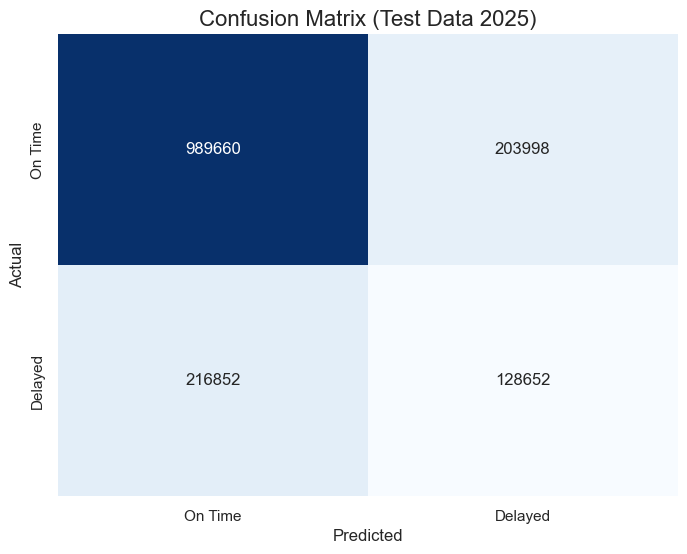

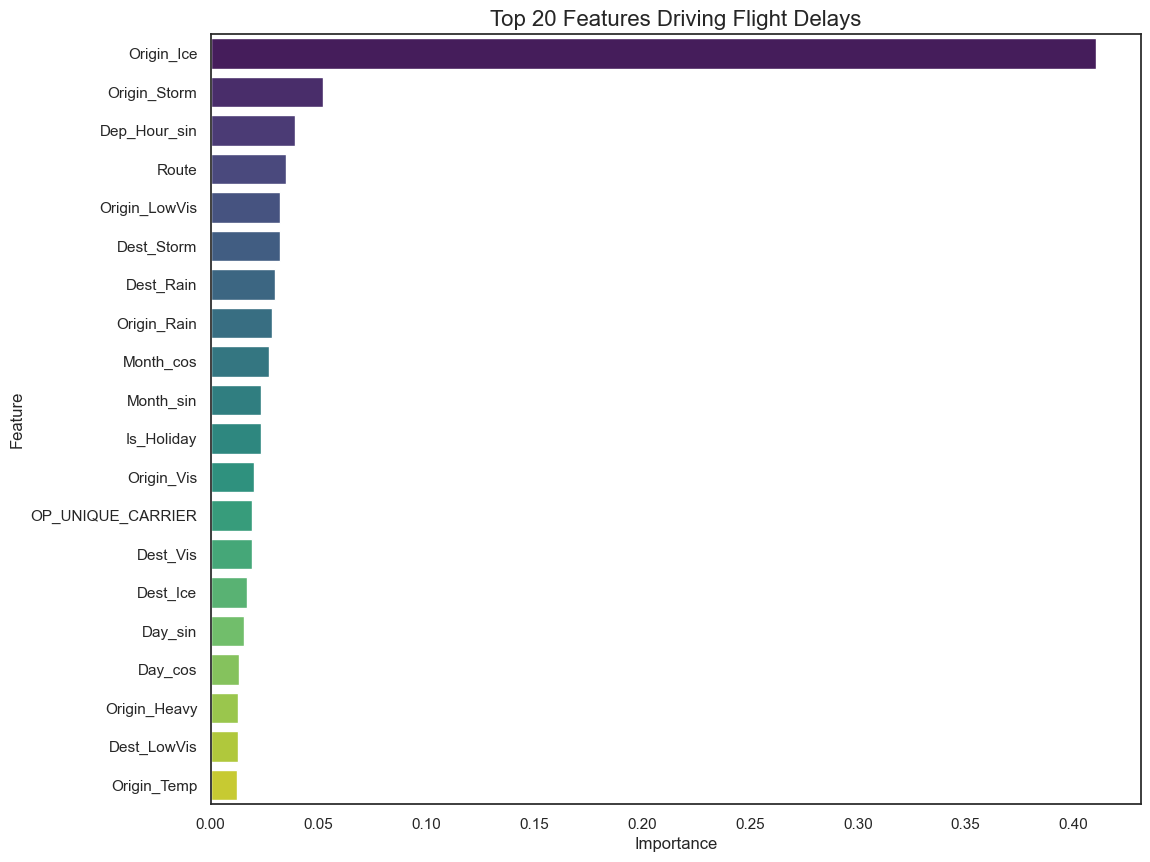

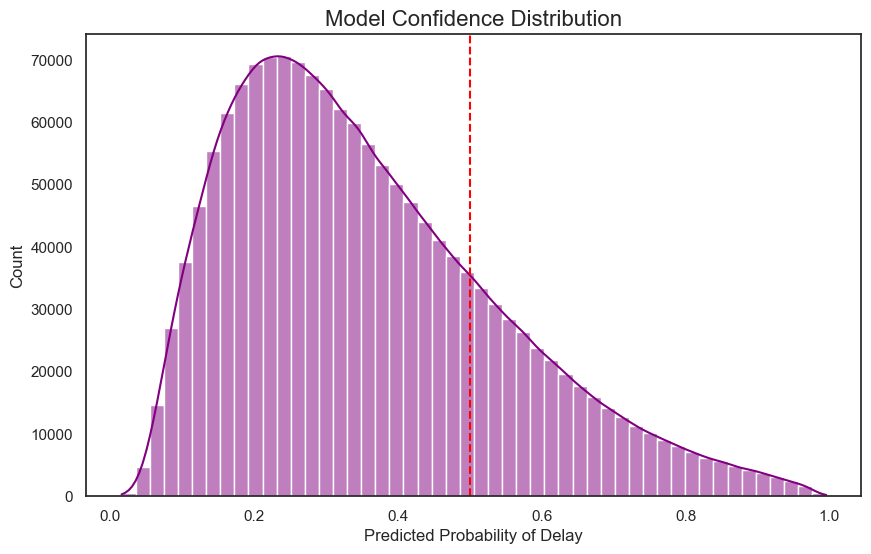

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import joblib

# --- CONFIGURATION ---
FILES = {
    'TRAIN': '2024_Ready.parquet',
    'TEST':  '2025_Ready.parquet'
}
TARGET = 'Is_Delayed_10min'



# --- HYPERPARAMETERS ---
# Adjust 'scale_pos_weight' based on your Sanity Check!
# If you have 20% delays, weight ~ 4.0. If 15% delays, weight ~ 5.6.
# Calculation: (Total Negatives / Total Positives)
params = {
    'n_estimators': 300,      # Increased from 200 (More trees = more learning)
    'learning_rate': 0.05,    # Decreased from 0.1 (Slower learning = better generalization)
    'max_depth': 10,          # Increased from 6 (Allow deeper logic)
    
    # CRITICAL CHANGE:
    # Lower this to balance the "Paranoia". 
    # If it was 4, try 2. This prioritizes Precision more than before.
    'scale_pos_weight': 2,    
    
    'subsample': 0.8,         # Use 80% of rows per tree (prevents overfitting)
    'colsample_bytree': 0.8,  # Use 80% of features per tree
    'random_state': 42,
    'n_jobs': -1
}

def train_and_evaluate():
    print("--- 1. LOADING DATA ---")
    train = pd.read_parquet(FILES['TRAIN'])
    test = pd.read_parquet(FILES['TEST'])
    
    # DROP 'YEAR' 
    if 'YEAR' in train.columns:
        print("Dropping 'YEAR' column (preventing leakage/bias)...")
        train = train.drop(columns=['YEAR'])
        test = test.drop(columns=['YEAR'])
    
    # Separate X and y
    X_train = train.drop(columns=[TARGET])
    y_train = train[TARGET]
    
    X_test = test.drop(columns=[TARGET])
    y_test = test[TARGET]
    
    feature_names = X_train.columns.tolist()
    print(f"Training on {len(X_train):,} flights with {len(feature_names)} features.")

    # Dataset sizes
    print(f"  > Training Set: {len(X_train):,} rows")
    print(f"  > Test Set:     {len(X_test):,} rows")
    
    # --- 2. TRAINING XGBOOST ---
    print("\n--- 2. TRAINING MODEL ---")
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    print("Training Complete.")
    
    # Save the model
    joblib.dump(model, 'flight_delay_model.pkl')
    print("Model saved to 'flight_delay_model.pkl'")

    # --- 3. EVALUATION ---
    print("\n--- 3. EVALUATING ON 2025 DATA ---")
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability for ROC-AUC
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"Accuracy:  {acc:.2%}")
    print(f"Precision: {prec:.2%} (Of those predicted delayed, how many were?)")
    print(f"Recall:    {rec:.2%} (Of actual delays, how many did we catch?)")
    print(f"ROC-AUC:   {auc:.4f} (Model separation power)")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # --- 4. VISUALIZATIONS ---
    
    # A. Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Test Data 2025)', fontsize=16)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['On Time', 'Delayed'])
    plt.yticks([0.5, 1.5], ['On Time', 'Delayed'])
    plt.savefig('Model_Confusion_Matrix.png')
    print("Saved Model_Confusion_Matrix.png")
    
    # B. Feature Importance (The "Why")
    plt.figure(figsize=(12, 10))
    # Get importance
    importance = model.feature_importances_
    # Create DataFrame
    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feat_imp = feat_imp.sort_values('Importance', ascending=False).head(20)
    
    sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
    plt.title('Top 20 Features Driving Flight Delays', fontsize=16)
    plt.savefig('Model_Feature_Importance.png')
    print("Saved Model_Feature_Importance.png")
    
    # C. Probability Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(y_prob, bins=50, kde=True, color='purple')
    plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
    plt.title('Model Confidence Distribution', fontsize=16)
    plt.xlabel('Predicted Probability of Delay')
    plt.savefig('Model_Probability_Dist.png')
    print("Saved Model_Probability_Dist.png")

if __name__ == "__main__":
    train_and_evaluate()

Loading Model and Test Data...
Generating ROC Curve...
Saved Report_ROC_Curve.png
Generating Calibration Curve...
Saved Report_Calibration_Curve.png
Generating Feature Importance...


C:\Users\samet\AppData\Local\Temp\ipykernel_40180\3185742398.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, y='Feature', x='Importance', palette='magma')


Saved Report_Feature_Importance.png


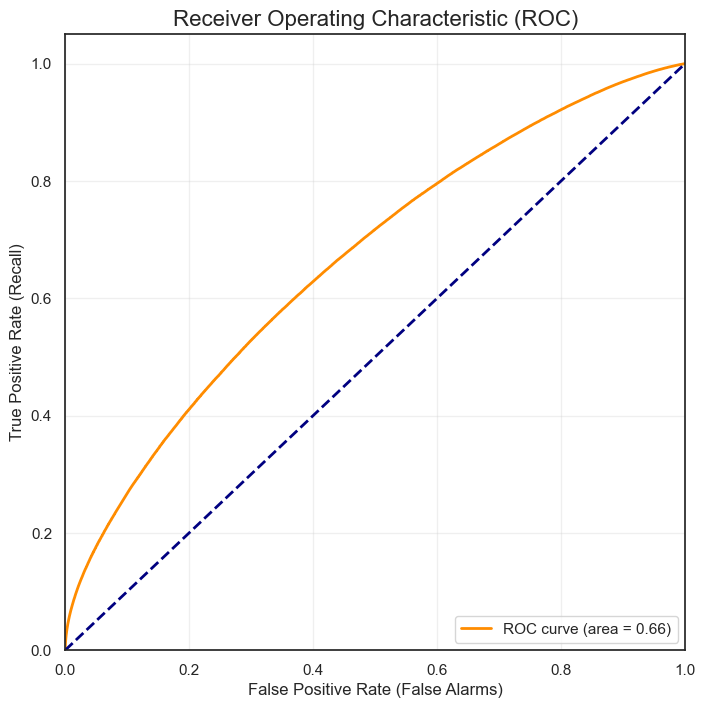

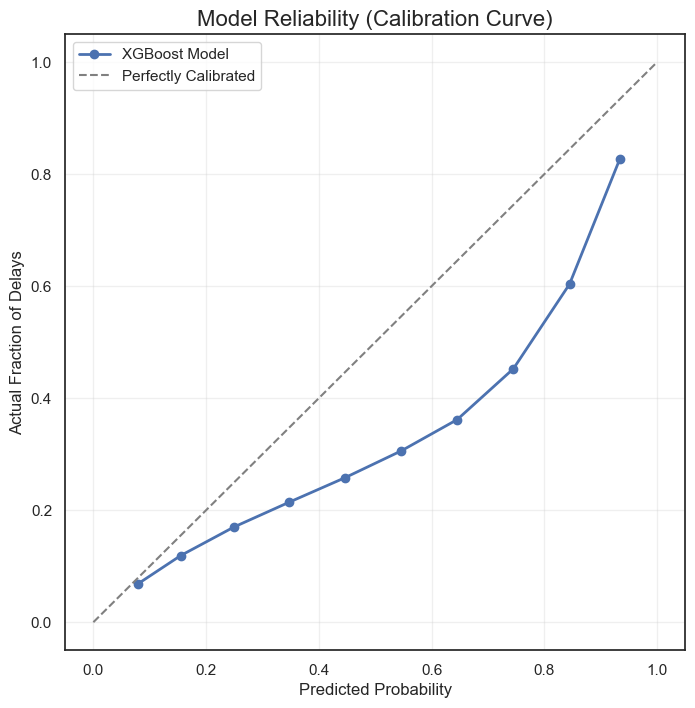

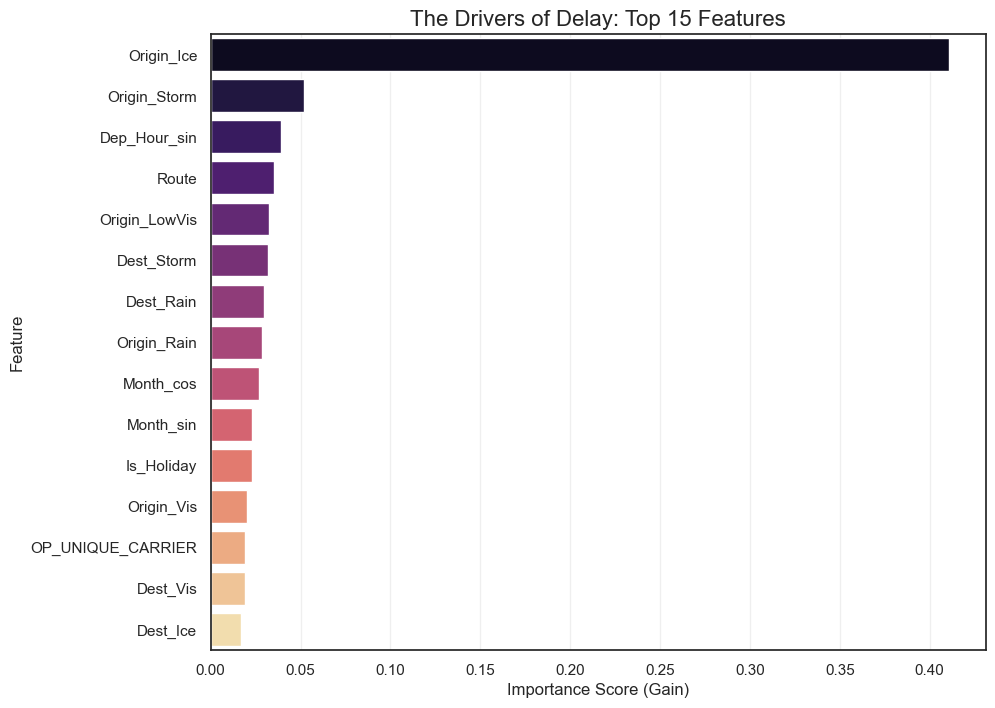

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve

# --- CONFIGURATION ---
FILE_TEST = '2025_Ready.parquet'
MODEL_FILE = 'flight_delay_model.pkl'
TARGET = 'Is_Delayed_10min'

def generate_report_plots():
    print("Loading Model and Test Data...")
    model = joblib.load(MODEL_FILE)
    test = pd.read_parquet(FILE_TEST)
    
    # Drop YEAR if it exists (Safety)
    if 'YEAR' in test.columns: test = test.drop(columns=['YEAR'])
    
    X_test = test.drop(columns=[TARGET])
    y_test = test[TARGET]
    
    # Get Probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # --- PLOT 1: ROC CURVE ---
    print("Generating ROC Curve...")
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (False Alarms)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.savefig('Report_ROC_Curve.png')
    print("Saved Report_ROC_Curve.png")
    
    # --- PLOT 2: CALIBRATION CURVE (Reliability) ---
    print("Generating Calibration Curve...")
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    
    plt.figure(figsize=(8, 8))
    plt.plot(prob_pred, prob_true, marker='o', linewidth=2, label='XGBoost Model')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Actual Fraction of Delays')
    plt.title('Model Reliability (Calibration Curve)', fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('Report_Calibration_Curve.png')
    print("Saved Report_Calibration_Curve.png")
    # Insight: If the blue line is BELOW the dotted line, your model is "Over-Confident" (Paranoid).
    
    # --- PLOT 3: FEATURE IMPORTANCE (Clean) ---
    print("Generating Feature Importance...")
    importance = model.feature_importances_
    features = X_test.columns
    
    feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
    feat_df = feat_df.sort_values('Importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feat_df, y='Feature', x='Importance', palette='magma')
    plt.title('The Drivers of Delay: Top 15 Features', fontsize=16)
    plt.xlabel('Importance Score (Gain)')
    plt.grid(axis='x', alpha=0.3)
    plt.savefig('Report_Feature_Importance.png')
    print("Saved Report_Feature_Importance.png")

if __name__ == "__main__":
    generate_report_plots()